In [379]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [380]:
#Read the file into a dataframe
train=pd.read_csv('C:/Users/dravi/Desktop/Lenovo backup/swathi/Flip Robo/Project-Housing_splitted/train.csv')
test=pd.read_csv('C:/Users/dravi/Desktop/Lenovo backup/swathi/Flip Robo/Project-Housing_splitted/test.csv')

In [381]:
train.shape

(1168, 81)

In [382]:
test.shape

(292, 80)

In [383]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Training Set has 1168 rows and 81 columns. Testing Set has 292 rows and 80 columns. 'SalePrice' is the target price and this is a Regression
problem.

Below is the description of the features

In [384]:
descfile=open('C:/Users/dravi/Desktop/Lenovo backup/swathi/Flip Robo/Project-Housing_splitted/Data Description.txt')
print(descfile.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [385]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

On a first view, it can be seen that column 'Id' is not useful.Drop 'Id'

In [386]:
train.drop(columns='Id',inplace=True)
test.drop(columns='Id',inplace=True)


In [387]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non-n

In [388]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
MSSubClass       292 non-null int64
MSZoning         292 non-null object
LotFrontage      247 non-null float64
LotArea          292 non-null int64
Street           292 non-null object
Alley            14 non-null object
LotShape         292 non-null object
LandContour      292 non-null object
Utilities        292 non-null object
LotConfig        292 non-null object
LandSlope        292 non-null object
Neighborhood     292 non-null object
Condition1       292 non-null object
Condition2       292 non-null object
BldgType         292 non-null object
HouseStyle       292 non-null object
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
RoofStyle        292 non-null object
RoofMatl         292 non-null object
Exterior1st      292 non-null object
Exterior2nd      292 non-null object
MasVnrType   

# Checking for Null Values

In [389]:
train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [390]:
test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

Find the percentage of null values in each column and arrange in descending order 

In [391]:
((train.isnull().sum()/(train.shape[0]))*100).sort_values(ascending=False)

PoolQC           99.400685
MiscFeature      96.232877
Alley            93.407534
Fence            79.708904
FireplaceQu      47.174658
LotFrontage      18.321918
GarageType        5.479452
GarageFinish      5.479452
GarageQual        5.479452
GarageCond        5.479452
GarageYrBlt       5.479452
BsmtExposure      2.654110
BsmtFinType2      2.654110
BsmtCond          2.568493
BsmtFinType1      2.568493
BsmtQual          2.568493
MasVnrArea        0.599315
MasVnrType        0.599315
RoofStyle         0.000000
RoofMatl          0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
Condition1        0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
U

In [392]:
((test.isnull().sum()/(test.shape[0]))*100).sort_values(ascending=False)

PoolQC           100.000000
MiscFeature       96.575342
Alley             95.205479
Fence             84.931507
FireplaceQu       47.602740
LotFrontage       15.410959
GarageCond         5.821918
GarageType         5.821918
GarageYrBlt        5.821918
GarageFinish       5.821918
GarageQual         5.821918
BsmtFinType1       2.397260
BsmtExposure       2.397260
BsmtCond           2.397260
BsmtQual           2.397260
BsmtFinType2       2.397260
Electrical         0.342466
MasVnrArea         0.342466
MasVnrType         0.342466
LandSlope          0.000000
RoofMatl           0.000000
MSZoning           0.000000
LotArea            0.000000
Street             0.000000
LotShape           0.000000
Foundation         0.000000
ExterCond          0.000000
ExterQual          0.000000
Exterior2nd        0.000000
Exterior1st        0.000000
RoofStyle          0.000000
Neighborhood       0.000000
YearRemodAdd       0.000000
YearBuilt          0.000000
OverallCond        0.000000
OverallQual        0

# Null values Treatment

Removing the rows with null values is not advisable as it leads to dataloss. A closer look at the description of the columns reveals that majority of the null values mean not existing. These null values can be replaced with 'None'. Columns with numerical values or something related to dimensions, null values can be imputed with meaningful values.

'PoolQC','Fence','MiscFeature','Alley','FireplaceQu','GarageType', 'GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
-null values in these can be filled with No for e.g 'PoolQc' with No Pool

'Electricity' - fill with the most frequent value i.e mode



In [393]:
train[train['LotFrontage'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
4             20       RL          NaN    16635   Pave   NaN      IR1   
6             20       RL          NaN    11341   Pave   NaN      IR1   
16            30       RM          NaN     5890   Pave   NaN      Reg   
18            20       RL          NaN     7917   Pave   NaN      IR1   
23            20       RL          NaN    10659   Pave   NaN      IR1   
25            20       RL          NaN    21000   Pave   NaN      Reg   
26            30       RL          NaN    25339   Pave   NaN      Reg   
32            90       RL          NaN    18890   Pave   NaN      IR1   
33            50       RM          NaN    12358   Pave   NaN      IR1   
34            60       RL          NaN    14762   Pave   NaN      IR2   
38            85       RL          NaN     7540   Pave   NaN      IR1   
56            20       RL          NaN    19900   Pave   NaN      Reg   
68            20       RL          NaN    32668   Pave   NaN      IR1   
79            20       RL          NaN    16196   Pave   NaN      IR3   
91            60       RL          NaN     9240   Pave   NaN      Reg   
94            60       RL          NaN    11075   Pave   NaN      IR1   
95           120       RL          NaN     6820   Pave   NaN      IR1   
110           60       RL          NaN    14803   Pave   NaN      IR1   
113           20       RL          NaN   115149   Pave   NaN      IR2   
117           60       RL          NaN    13031   Pave   NaN      IR2   
118          120       RL          NaN     3696   Pave   NaN      Reg   
123           50       RM          NaN     7920   Pave  Grvl      IR1   
125           20       RL          NaN    11717   Pave   NaN      IR1   
134           60       RL          NaN    11050   Pave   NaN      Reg   
136           60       RL          NaN     9505   Pave   NaN      IR1   
137           20       RL          NaN     8339   Pave   NaN      IR1   
139           60       RL          NaN    11250   Pave   NaN      Reg   
142           20       RL          NaN    16669   Pave   NaN      IR1   
150           20       RL          NaN     9830   Pave   NaN      IR1   
151           60       RL          NaN    16659   Pave   NaN      IR1   
158           20       RL          NaN    12735   Pave   NaN      IR1   
159           20       RL          NaN     6627   Pave   NaN      IR1   
165          120       RM          NaN     4426   Pave   NaN      Reg   
187           20       RL          NaN    15611   Pave   NaN      IR1   
188           20       RL          NaN    11000   Pave   NaN      IR1   
189           20       RL          NaN    12493   Pave   NaN      IR1   
198           20       RL          NaN     9156   Pave   NaN      IR1   
199           20       RL          NaN    12925   Pave   NaN      IR1   
206           20       RL          NaN    20781   Pave   NaN      IR2   
208           80       RL          NaN     9947   Pave   NaN      IR1   
209           20       RL          NaN     8475   Pave   NaN      IR1   
211           40       RL          NaN    23595   Pave   NaN      Reg   
216           20       RL          NaN     9500   Pave   NaN      IR1   
220           20       RL          NaN    11425   Pave   NaN      IR1   
223           80       RL          NaN     7750   Pave   NaN      IR1   
229           20       RL          NaN     8885   Pave   NaN      IR1   
236           20       RL          NaN    10920   Pave   NaN      IR1   
237           20       RL          NaN    15870   Pave   NaN      IR1   
239           50       RM          NaN     5700   Pave   NaN      Reg   
242          120       RL          NaN     4928   Pave   NaN      IR1   
253           60       RL          NaN     9453   Pave   NaN      IR1   
254          120       RL          NaN     6563   Pave   NaN      IR1   
257           80       RL          NaN    10395   Pave   NaN    

LotFrontage cannot be zero.So impute with Neighborhood mean.

In [394]:
train[train['MasVnrType'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
68           20       RL          NaN    32668   Pave   NaN      IR1   
78           20       RL        107.0    13891   Pave   NaN      Reg   
99           60       FV         65.0     8125   Pave   NaN      Reg   
185          20       FV         95.0    11639   Pave   NaN      Reg   
224         120       FV         35.0     4274   Pave  Pave      IR1   
367          60       RL         75.0     9473   Pave   NaN      Reg   
874          60       RL          NaN     7851   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
68          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
78          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
99          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
185         Lvl    AllPub    Corner       Gtl      Somerst       Norm   
224         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
367         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
874         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
68        Norm     1Fam     1Story            6            3       1957   
78        Norm     1Fam     1Story           10            5       2006   
99        Norm     1Fam     2Story            7            6       2007   
185       Norm     1Fam     1Story            7            5       2007   
224       Norm   TwnhsE     1Story            7            5       2006   
367       Norm     1Fam     2Story            8            5       2002   
874       Norm     1Fam     2Story            6            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
68           1975       Hip  CompShg     Wd Sdng       Stone        NaN   
78           2006     Gable  CompShg     VinylSd     VinylSd        NaN   
99           2007     Gable  CompShg     CemntBd     CmentBd        NaN   
185          2008     Gable  CompShg     CemntBd     CmentBd        NaN   
224          2007     Gable  CompShg     VinylSd     VinylSd        NaN   
367          2002     Gable  CompShg     VinylSd     VinylSd        NaN   
874          2002     Gable  CompShg     VinylSd     VinylSd        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
68          NaN        Gd        TA      PConc       TA       TA           No   
78          NaN        Ex        TA      PConc       Ex       Gd           Gd   
99          NaN        Gd        TA      PConc       Gd       TA           No   
185         NaN        Gd        TA      PConc       Gd       TA           No   
224         NaN        Gd        TA      PConc       Gd       TA           No   
367         NaN        Gd        TA      PConc       Gd       TA           No   
874         NaN        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
68           Rec        1219          Unf           0        816         2035   
78           GLQ        1386          Unf           0        690         2076   
99           Unf           0          Unf           0        813          813   
185          Unf           0          Unf           0       1428         1428   
224          GLQ        1106          Unf           0        135         1241   
367          GLQ         804          Unf           0        324         1128   
874          GLQ         625          Unf           0        235          860   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
68     GasA        TA          Y      SBrkr      2515         0             0   
78     GasA        Ex          Y      SBrkr      2076         0             0   
99     GasA        Ex          Y      SBrkr       822       843             0   
185    GasA        

In [395]:
train[train['MasVnrType']=='None']

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
1             20       RL         95.0    15865   Pave   NaN      IR1   
2             60       RL         92.0     9920   Pave   NaN      IR1   
5             60       RL         58.0    14054   Pave   NaN      IR1   
8             20       RL         70.0     9170   Pave   NaN      Reg   
9             50       RL         80.0     8480   Pave   NaN      Reg   
10            50       RM         50.0     8600   Pave   NaN      Reg   
12            20       RL        129.0     9196   Pave   NaN      IR1   
14            50       RL         59.0    16466   Pave   NaN      IR1   
15            70       RL         55.0    10592   Pave   NaN      Reg   
16            30       RM          NaN     5890   Pave   NaN      Reg   
21            85       RL         70.0     8445   Pave   NaN      Reg   
22            20       RL         68.0     9717   Pave   NaN      Reg   
23            20       RL          NaN    10659   Pave   NaN      IR1   
26            30       RL          NaN    25339   Pave   NaN      Reg   
28            45       RM         58.0     6380   Pave   NaN      Reg   
29            70       RL         74.0    11988   Pave   NaN      IR1   
31            60       RM         60.0     3378   Pave  Grvl      Reg   
32            90       RL          NaN    18890   Pave   NaN      IR1   
33            50       RM          NaN    12358   Pave   NaN      IR1   
34            60       RL          NaN    14762   Pave   NaN      IR2   
35            20       RL        120.0    10356   Pave   NaN      Reg   
37            20       RL         84.0    12615   Pave   NaN      Reg   
38            85       RL          NaN     7540   Pave   NaN      IR1   
39            40       RM         50.0     9100   Pave   NaN      Reg   
41            20       RL         70.0    13300   Pave   NaN      Reg   
42           160       FV         30.0     3180   Pave  Pave      Reg   
45            20       RL         76.0     8314   Pave   NaN      Reg   
47            20       RM        100.0    12000   Pave   NaN      Reg   
48            20       RL         50.0     5000   Pave   NaN      Reg   
49            20       RL         70.0     7931   Pave   NaN      Reg   
51            50       RM         60.0    10440   Pave  Grvl      Reg   
52            30       RL         60.0     8400   Pave   NaN      Reg   
53            20       RL         64.0     8712   Pave   NaN      IR1   
54            20       RL         60.0    11100   Pave   NaN      Reg   
57            60       RL        107.0    10186   Pave   NaN      IR1   
58            30       RM         50.0     8765   Pave  Grvl      Reg   
59            20       RL        122.0    11923   Pave   NaN      IR1   
60            20       RL         60.0     7200   Pave   NaN      Reg   
61            85       RL         68.0     7838   Pave   NaN      Reg   
62            20       RL         60.0     7024   Pave   NaN      Reg   
64            20       RL         70.0     9100   Pave   NaN      Reg   
66            50       RM         50.0     5500   Pave   NaN      Reg   
67            20       RL         62.0     9858   Pave   NaN      Reg   
70            60       RL         65.0     8366   Pave   NaN      IR1   
72           190       RM         60.0     6780   Pave   NaN      Reg   
74            30       RH         70.0     4270   Pave   NaN      Reg   
76            50       RL         60.0    10410   Pave   NaN      Reg   
77            45       RM         50.0     5000   Pave   NaN      Reg   
79            20       RL          NaN    16196   Pave   NaN      IR3   
80            20       RL         73.0     8990   Pave   NaN      IR1   
81            50       RM         50.0     8635   Pave   NaN      Reg   
82            50       RL         77.0     9786   Pave   NaN      IR1   
83            20       RL         77.0    10010   Pave   NaN    

In [396]:
train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

MasVnrType and MasVnrArea both have null values for same rows. Impute the MasVnrType null values with the most frequent 'None'.
Also it can be seen that corresponding to MasVnrType None MasVnrArea values are zero. So fill MasVnrArea null values with zero

In [397]:
test['Electrical'].value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

In [398]:
train[train['GarageYrBlt'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48            20       RL         50.0     5000   Pave   NaN      Reg   
72           190       RM         60.0     6780   Pave   NaN      Reg   
74            30       RH         70.0     4270   Pave   NaN      Reg   
105           20       RL         70.0    10500   Pave   NaN      Reg   
116           20       RL         63.0     7500   Pave   NaN      Reg   
123           50       RM          NaN     7920   Pave  Grvl      IR1   
127          190       RL         62.0    10106   Pave   NaN      Reg   
149           45       RM         50.0     6130   Pave   NaN      Reg   
180           30       RM         40.0     3636   Pave   NaN      Reg   
184          190       RL         70.0     7000   Pave   NaN      Reg   
197           70       RH         55.0     8525   Pave   NaN      Reg   
227           45       RL         55.0     5500   Pave   NaN      Reg   
314           20       RL          NaN     9000   Pave   NaN      Reg   
327           20       RL         60.0     8430   Pave   NaN      Reg   
333           50       RL         60.0     6000   Pave   NaN      Reg   
378           90       RL         67.0     8777   Pave   NaN      Reg   
396           50       RM         50.0     5925   Pave   NaN      Reg   
420          180       RM         21.0     1890   Pave   NaN      Reg   
429           50       RL         60.0     9600   Pave   NaN      Reg   
468           50       RL         58.0     8410   Pave   NaN      Reg   
474           30       RL          NaN     7446   Pave   NaN      Reg   
491           90       RL         75.0     9825   Pave   NaN      Reg   
510           30       RM         51.0     6120   Pave   NaN      Reg   
537          180       RM         21.0     1533   Pave   NaN      Reg   
545           30       RL         50.0     5330   Pave   NaN      Reg   
546           30       RL         51.0     5900   Pave   NaN      IR1   
548           30       RL         67.0     8777   Pave   NaN      Reg   
584           20       RL         90.0    17217   Pave   NaN      Reg   
585           30       RL         67.0     5604   Pave   NaN      Reg   
597           20       RL         63.0    10712   Pave   NaN      Reg   
614          190       RH         60.0    10896   Pave  Pave      Reg   
615           30       RL         55.0     5350   Pave   NaN      IR1   
636           50       RM         55.0     8800   Pave  Grvl      Reg   
655           50       RL         54.0     6342   Pave   NaN      Reg   
656          160       RM         21.0     1680   Pave   NaN      Reg   
664           90       RL         80.0     8000   Pave   NaN      Reg   
683           75       RM         35.0     6300   Pave  Grvl      Reg   
696           20       RL         77.0     9320   Pave   NaN      IR1   
718           70       RM         60.0     6882   Pave   NaN      Reg   
726           30       RL         56.0     4130   Pave   NaN      IR1   
731           20       RL          NaN     8125   Pave   NaN      IR1   
769           50  C (all)        105.0     8470   Pave   NaN      IR1   
775           90       RL         60.0    10800   Pave   NaN      Reg   
804          190       RL         55.0     5687   Pave  Grvl      Reg   
811           20       RL         70.0     8402   Pave   NaN      Reg   
831          180       RM         21.0     1491   Pave   NaN      Reg   
846           30       RL          NaN    10020   Pave   NaN      IR1   
867          190       RH          NaN     7082   Pave   NaN      Reg   
884          190       RL         60.0    10800   Pave  Grvl      Reg   
902          160       RM         21.0     1533   Pave   NaN      Reg   
952           90       RL         35.0     9400   Pave   NaN      IR1   
956           30  C (all)         60.0     7879   Pave   NaN      Reg   
959           30       RL         63.0    13907   Pave   NaN      Reg   
1018          90       RL         72.0    10778   Pave   NaN    

If we observe 'GarageCars' and 'GarageArea', their values corresponding to null values in the other Garage variables are zero. That means all null values correspond to 'No Garage'.

We cannot impute 'GarageYrBlt' null values with zero. Fill them with minimum of 'GarageYrBlt'

In [399]:
tem2=test['Electrical'].mode()[0]

In [400]:
tem1=train['Electrical'].mode()[0]

In [401]:
train['PoolQC'].fillna('No Pool',inplace=True)
test['PoolQC'].fillna('No Pool',inplace=True)

In [402]:
train['Fence'].fillna('No Fence',inplace=True)
test['Fence'].fillna('No Fence',inplace=True)

In [403]:
train['MiscFeature'].fillna('No MiscFeature',inplace=True)
test['MiscFeature'].fillna('No MiscFeature',inplace=True)

In [404]:
train['Alley'].fillna('No Alley',inplace=True)
test['Alley'].fillna('No Alley',inplace=True)

In [405]:
train['FireplaceQu'].fillna('No Fireplace',inplace=True)
test['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [406]:
for i in ['GarageType', 'GarageFinish','GarageQual','GarageCond']:
    train[i].fillna('No Garage',inplace=True)
    test[i].fillna('No Garage',inplace=True)

In [407]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    train[i].fillna('No basement',inplace=True)
    test[i].fillna('No basement',inplace=True)

In [408]:
train['MasVnrType'].fillna('None',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)

In [409]:
train['Electrical'].fillna(tem1,inplace=True)
test['Electrical'].fillna(tem2,inplace=True)

In [410]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].min(),inplace=True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].min(),inplace=True)


In [411]:
train['MasVnrArea'].fillna(0,inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)


In [412]:
train['LotFrontage']=train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(np.mean(x)))
test['LotFrontage']=test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(np.mean(x)))


In [413]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [414]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

All the null values are treated

# Feature Engineering

Features 'YearBuilt','YearRemodAdd','YrSold','GarageYrBlt' can be modified to extract useful information.

Feature 'Age of House' can be extracted with respect to year sold. 'Years RemodAdd' which represents no of years passed after remodelling/additions can also be extracted.Similarly 'Age of Garage' can be extracted.

In [415]:
train['Age of House']=train['YrSold']-train['YearBuilt']
test['Age of House']=test['YrSold']-test['YearBuilt']

In [416]:
train['Years Since RemodAdd']=train['YrSold']-train['YearRemodAdd']
test['Years Since RemodAdd']=test['YrSold']-test['YearRemodAdd']

In [417]:
train['Age of Garage']=train['YrSold']-train['GarageYrBlt']
test['Age of Garage']=test['YrSold']-test['GarageYrBlt']

In [418]:
train['Age of House'].describe()

count    1168.000000
mean       36.874144
std        30.193130
min         0.000000
25%         8.000000
50%        36.000000
75%        54.000000
max       135.000000
Name: Age of House, dtype: float64

In [419]:
train[train['Age of House']==0]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
5             60       RL         58.0    14054   Pave  No Alley      IR1   
27            20       RL         88.0    11394   Pave  No Alley      Reg   
71            20       RL         76.0     9158   Pave  No Alley      Reg   
78            20       RL        107.0    13891   Pave  No Alley      Reg   
80            20       RL         73.0     8990   Pave  No Alley      IR1   
194          120       RL         53.0     4045   Pave  No Alley      Reg   
233           20       RL         50.0    14859   Pave  No Alley      IR1   
248           60       RL         83.0    13159   Pave  No Alley      IR1   
258           20       RL         73.0     8899   Pave  No Alley      IR1   
286           20       RL         89.0    10991   Pave  No Alley      IR1   
330           20       RL         49.0    15256   Pave  No Alley      IR1   
335           20       RL         79.0     9416   Pave  No Alley      Reg   
352          120       RL         65.0     8769   Pave  No Alley      Reg   
355           60       RL         86.0    11065   Pave  No Alley      IR1   
360           20       FV         81.0    11216   Pave  No Alley      Reg   
361           60       RL        130.0    40094   Pave  No Alley      IR1   
373           20       RL         91.0    12274   Pave  No Alley      IR1   
382           20       RL         64.0     6762   Pave  No Alley      Reg   
383           60       RL         82.0    12438   Pave  No Alley      IR1   
384           60       RL        105.0    15578   Pave  No Alley      IR1   
404           60       FV         84.0    10728   Pave  No Alley      Reg   
412           60       FV         84.0    10207   Pave  No Alley      Reg   
444           20       RL         93.0    12030   Pave  No Alley      Reg   
466           20       RL         79.0     9541   Pave  No Alley      IR1   
485           60       RL         69.0     9588   Pave  No Alley      IR1   
493           20       RL         85.0    10182   Pave  No Alley      IR1   
531           60       RL        120.0    15611   Pave  No Alley      Reg   
584           20       RL         90.0    17217   Pave  No Alley      Reg   
592           60       RL        313.0    63887   Pave  No Alley      IR3   
619           60       RL         65.0     9018   Pave  No Alley      IR1   
722           20       RL         96.0    12444   Pave  No Alley      Reg   
728           20       FV         75.0     7862   Pave  No Alley      IR1   
730           60       RL         73.0     8760   Pave  No Alley      Reg   
746           60       FV         75.0     9000   Pave  No Alley      Reg   
789           60       FV         65.0     8125   Pave  No Alley      Reg   
791          120       RM         64.0     5587   Pave  No Alley      IR1   
796           20       FV         60.0     7200   Pave      Pave      Reg   
798           20       RL         90.0    11694   Pave  No Alley      Reg   
800           60       RL        168.0    23257   Pave  No Alley      IR3   
811           20       RL         70.0     8402   Pave  No Alley      Reg   
820           60       FV         75.0     8004   Pave  No Alley      IR1   
862          120       RL         68.0     7820   Pave  No Alley      IR1   
868           20       RL         73.0     8993   Pave  No Alley      IR1   
872          160       FV         30.0     3000   Pave      Pave      Reg   
880           60       FV         72.0     8640   Pave  No Alley      Reg   
892           20       RL         64.0     7406   Pave  No Alley      Reg   
910           60       RL         77.0     9965   Pave  No Alley      Reg   
934           20       FV         60.0     7200   Pave      Pave      Reg   
985           60       RL        111.0    16259   Pave  No Alley      Reg   
988           20       RL         64.0     6762   Pave  No Alley      Reg   
991           60       RL         58.0    17104   Pave  No Alley      IR1   
10

In [420]:
train['Years Since RemodAdd'].describe()

count    1168.000000
mean       23.046233
std        20.783486
min        -1.000000
25%         4.000000
50%        14.000000
75%        42.000000
max        60.000000
Name: Years Since RemodAdd, dtype: float64

In [421]:
train[train['Years Since RemodAdd']==-1]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
361          60       RL        130.0    40094   Pave  No Alley      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
361         Bnk    AllPub    Inside       Gtl      Edwards       PosN   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
361       PosN     1Fam     2Story           10            5       2007   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
361          2008       Hip  CompShg     CemntBd     CmentBd      Stone   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
361       762.0        Ex        TA      PConc       Ex       TA           Gd   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
361          GLQ        2260          Unf           0        878         3138   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
361    GasA        Ex          Y      SBrkr      3138      1538             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
361       4676             1             0         3         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
361             1          Ex            11        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
361          Gd    BuiltIn       2007.0          Fin           3         884   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
361         TA         TA          Y         208          406              0   

     3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence     MiscFeature  \
361          0            0         0  No Pool  No Fence  No MiscFeature   

     MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  Age of House  \
361        0      10    2007      New       Partial     184750             0   

     Years Since RemodAdd  Age of Garage  
361                    -1            0.0

This appears to be a wrong entry, so taking YearRemodAdd as 2007, make Years Since RemodAdd =0.

In [422]:
train.loc[train['Years Since RemodAdd']==-1,'Years Since RemodAdd']=0

In [423]:
train[train['Years Since RemodAdd']==-1]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, Age of House, Years Since RemodAdd, Age of Garage]
Index: []

In [424]:
train['Age of Garage'].describe()

count    1168.000000
mean       33.895548
std        30.088690
min         0.000000
25%         7.000000
50%        30.000000
75%        50.000000
max       110.000000
Name: Age of Garage, dtype: float64

In [425]:
test['Age of Garage'].describe()

count    292.000000
mean      32.743151
std       29.783742
min        0.000000
25%        6.000000
50%       30.000000
75%       47.000000
max      110.000000
Name: Age of Garage, dtype: float64

In [426]:
test['Age of House'].describe()

count    292.000000
mean      35.243151
std       30.494309
min        0.000000
25%        6.750000
50%       32.000000
75%       53.250000
max      136.000000
Name: Age of House, dtype: float64

In [427]:
test['Years Since RemodAdd'].describe()

count    292.000000
mean      22.565068
std       20.089470
min        0.000000
25%        4.000000
50%       14.000000
75%       39.250000
max       60.000000
Name: Years Since RemodAdd, dtype: float64

Drop 'YrSold','YearBuilt','YearRemodAdd','GarageYrBlt' features

In [428]:
train.drop(columns=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],inplace=True)
test.drop(columns=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],inplace=True)

In [429]:
descfile=open('C:/Users/dravi/Desktop/Lenovo backup/swathi/Flip Robo/Project-Housing_splitted/Data Description.txt')
print(descfile.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [430]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0         120       RL    33.666667     4928   Pave  No Alley      IR1   
1          20       RL    95.000000    15865   Pave  No Alley      IR1   
2          60       RL    92.000000     9920   Pave  No Alley      IR1   
3          20       RL   105.000000    11751   Pave  No Alley      IR1   
4          20       RL    81.472222    16635   Pave  No Alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm   TwnhsE     1Story            6            5     Gable  CompShg   
1       Norm     1Fam     1Story            8            6      Flat  Tar&Grv   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     1Story            6            6       Hip  CompShg   
4       Norm     1Fam     1Story            6            7     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1          TA     Attchd   
4          Gd             8        Typ  

In [431]:
train.shape

(1168, 79)

In [432]:
test.shape

(292, 78)

Classify the variables

Nominal Categorical Variables-'MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1',
'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical',
'GarageType','MiscFeature','SaleCondition','MoSold','Functional','SaleType'



Ordinal categorical Variables-'LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
'PavedDrive','PoolQC','Fence'


Numerical Variables-'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','Age of House','Years Since RemodAdd','Age of Garage','SalePrice'


In [433]:
noclist=['MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical', 'GarageType','MiscFeature','SaleCondition','MoSold','Functional','SaleType']
oclist=['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'PavedDrive','PoolQC','Fence']
nulist=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']

# Data Visualisation

Continous Variables

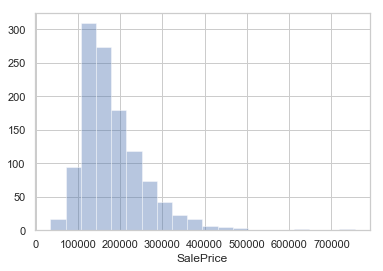

In [434]:
sns.set(style='whitegrid')
sns.distplot(train['SalePrice'],kde=False,norm_hist=False,bins=20)

Most of the houses are sold in the range 100000 to 200000. Very few houses are sold below 100000 and above 400000

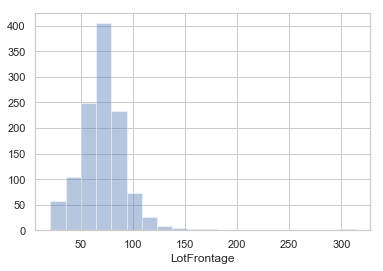

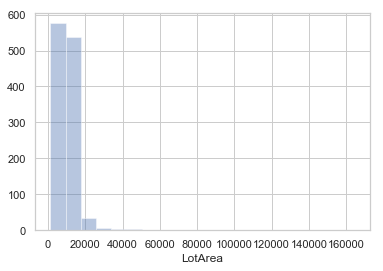

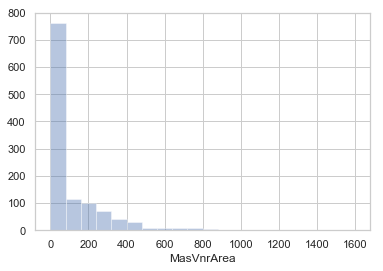

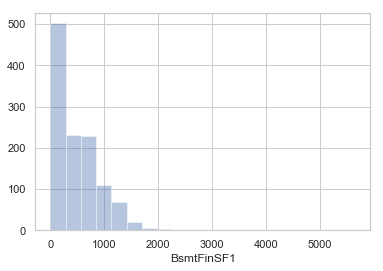

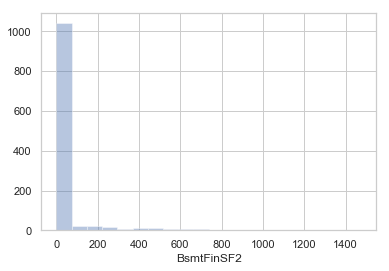

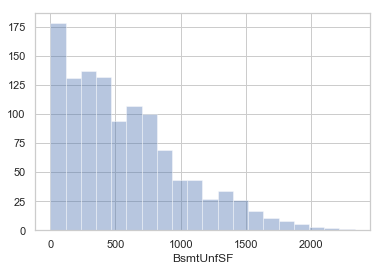

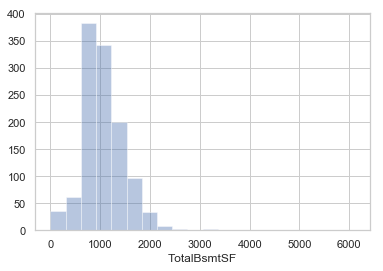

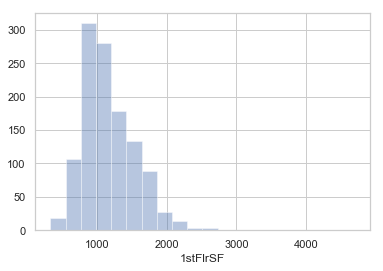

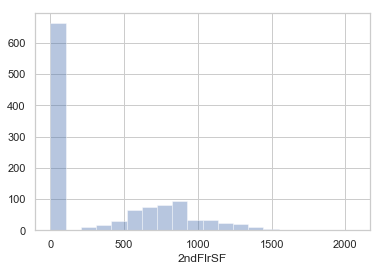

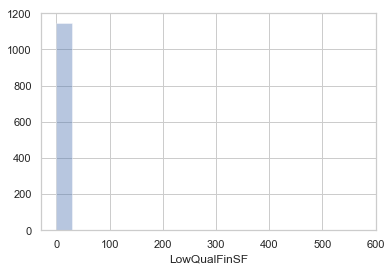

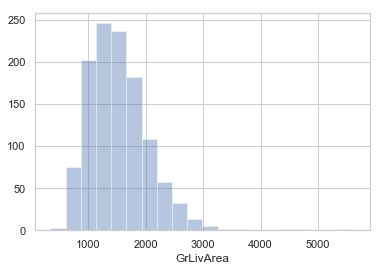

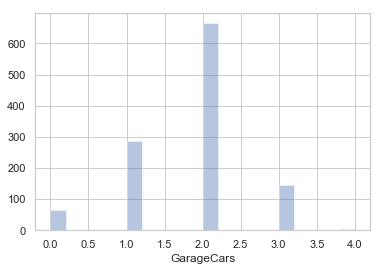

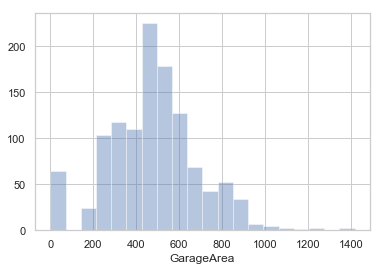

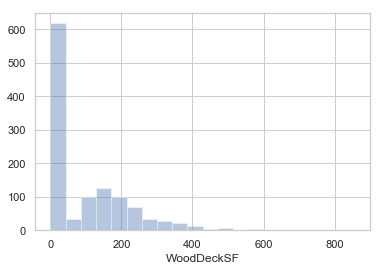

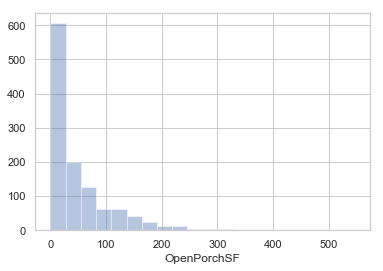

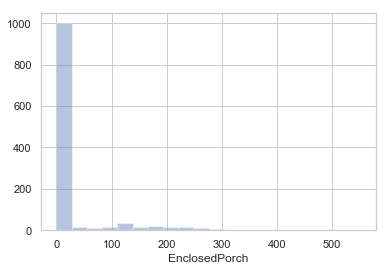

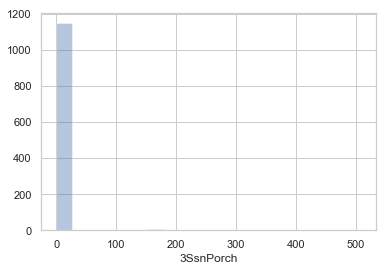

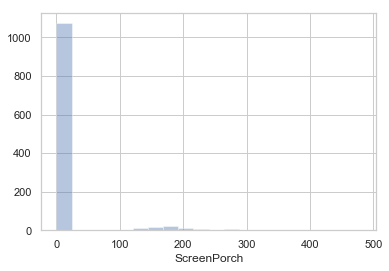

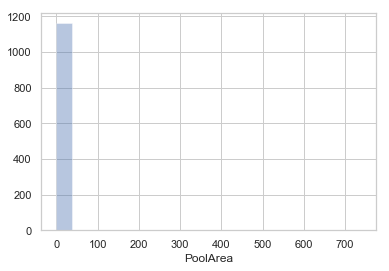

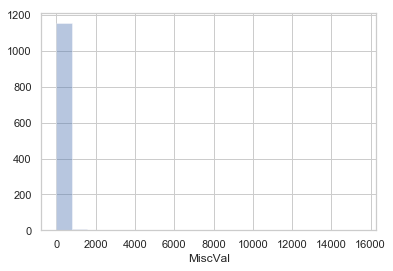

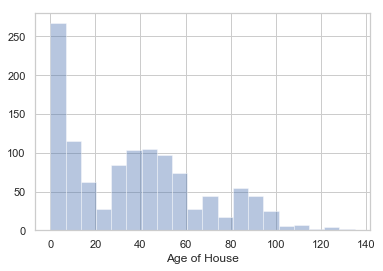

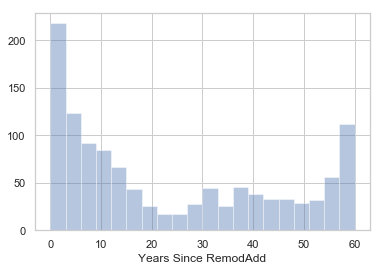

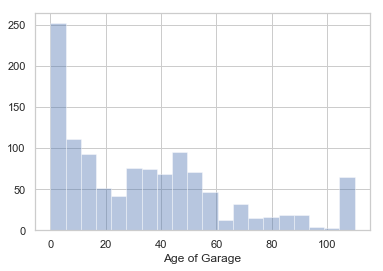

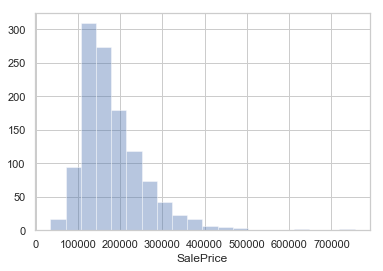

In [435]:
for i in nulist:
    plt.subplots()
    sns.distplot(train[i],kde=False,norm_hist=False,bins=20)

Lot area is in the range of 2000 to 18000 sft. Very less houses with lot area above 18000sft.

Majority of the houses have 1st floor area around 1000sft

Most of the houses have ground floor area around 1000-2000sft

Number of full bathrooms in the basement is zero for majority of the houses, around 40% of the houses have 1 full bathroom in the basement.

94% of the houses have no halfbathroom in the basement.Only 5% of the houses have 1 halfbathroom in the basement.


Majority of the houses are of age in the range 1-5yrs, though there are houses in other age groups also. Very few houses are above 100yrs

No of years since remodelled is varied. There are some houses which are not remodelled.

In [436]:
train[nulist].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     71.586288   10484.749144   101.696918   444.726027    46.647260   
std      22.899081    8957.442311   182.218483   462.664785   163.520016   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7621.500000     0.000000     0.000000     0.000000   
50%      72.197368    9522.500000     0.000000   385.500000     0.000000   
75%      81.000000   11515.500000   160.000000   714.500000     0.000000   
max     313.000000  164660.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1525.066781     1.776541   476.860445    96.206336    46.559932   
std     528.042957     0.745554   214.466769   126.158988    66.381023   
min     334.000000     0.000000     0.000000     0.000000     0.000000   
25%    1143.250000     1.000000   338.000000     0.000000     0.000000   
50%    1468.500000     2.000000   480.000000     0.000000    24.000000   
75%    1795.000000     2.000000   576.000000   171.000000    70.000000   
max    5642.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean       23.015411     3.639555    15.051370     3.448630     47.315068   
std        63.191089    29.088867    55.080816    44.896939    543.264432   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

       Age of House  Years Since RemodAdd  Age of Garage      SalePrice  
count   1168.000000           1168.000000    1168.000000    1168.000000  
mean      36.874144             23.047089      33.895548  181477.005993  
std       30.193130             20.782515      30.088690   79105.586863  
min        0.000000              0.000000       0.000000   34900.000000  
25%        8.000000              4.000000       7.000000  130375.000000  
50%       36.000000             14.000000      30.000000  163995.000000  
75%       54.000000             42.000000      50.000000  215000.000000  
max      135.000000             60.000000     110.000000  755000.000000

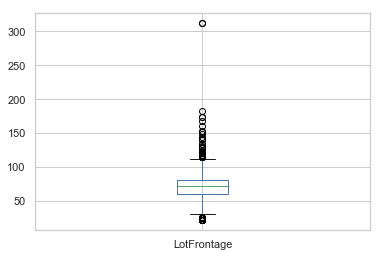

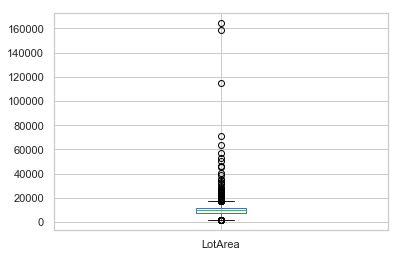

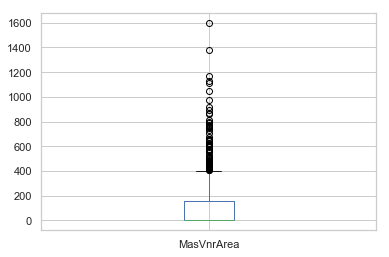

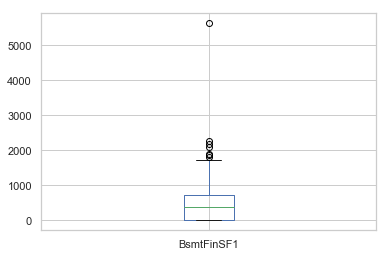

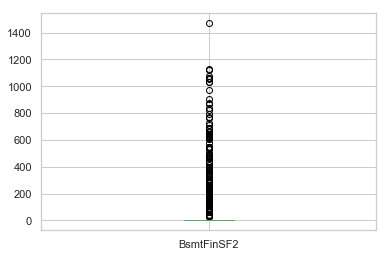

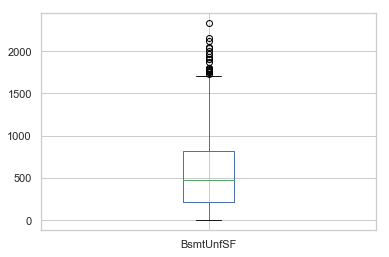

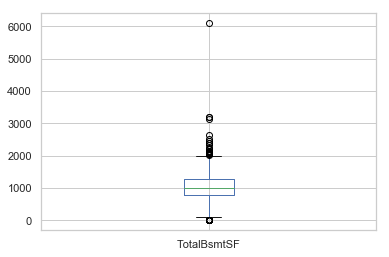

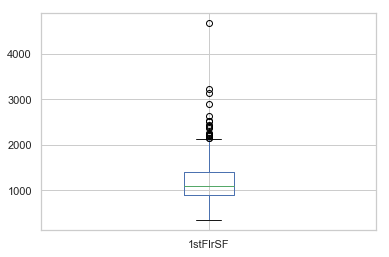

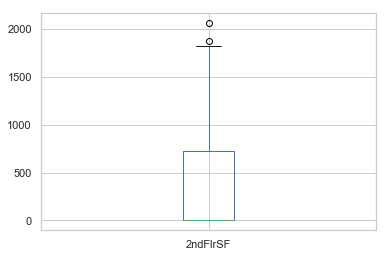

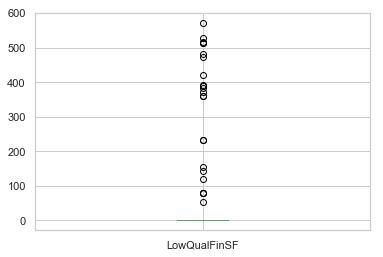

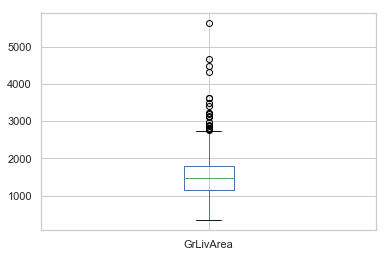

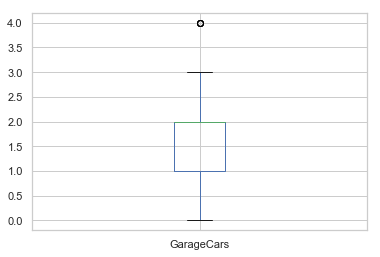

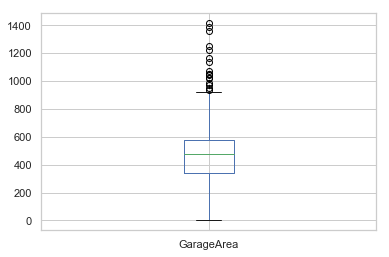

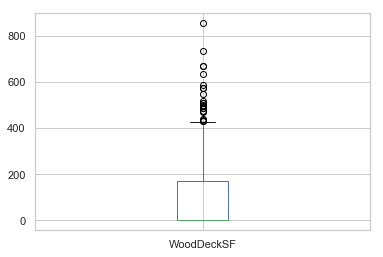

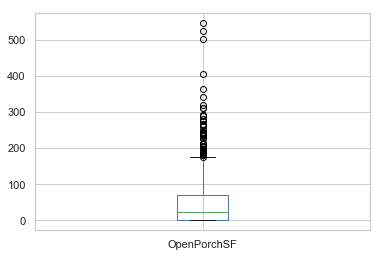

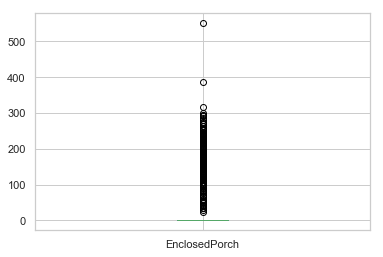

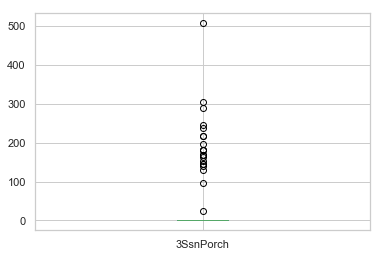

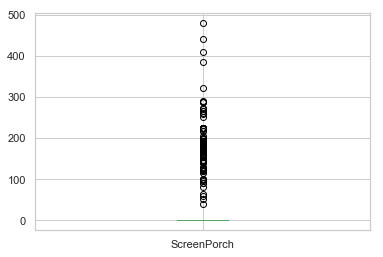

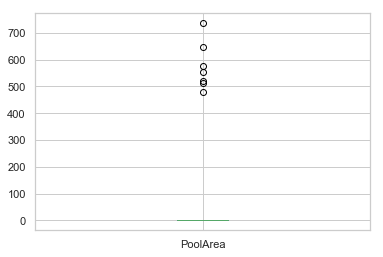

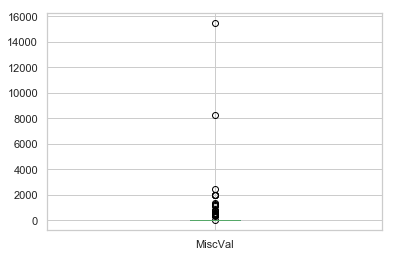

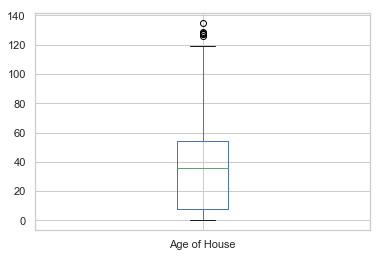

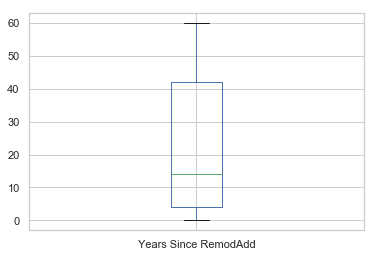

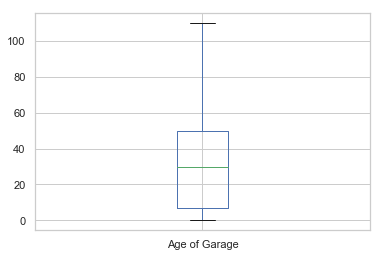

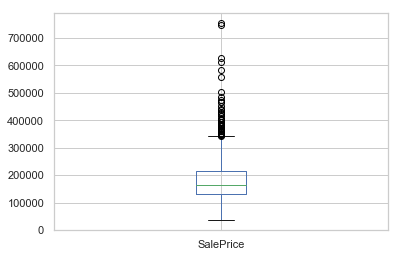

In [437]:
for i in nulist:
    plt.subplots()
    train[i].plot.box()

Categorical variables

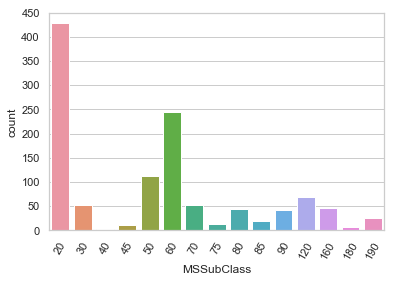

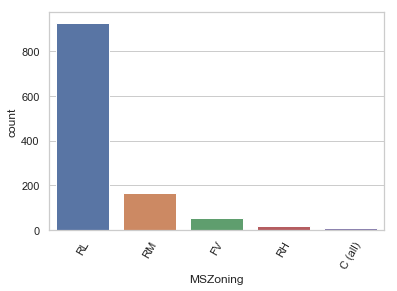

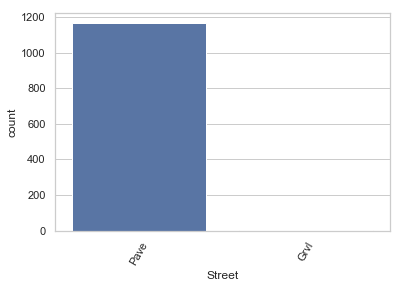

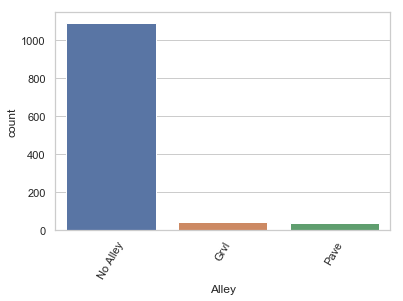

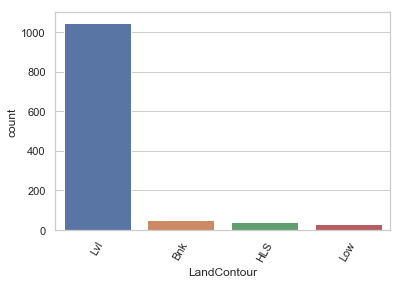

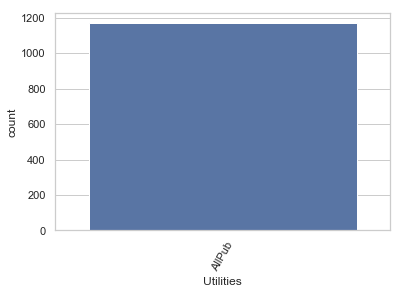

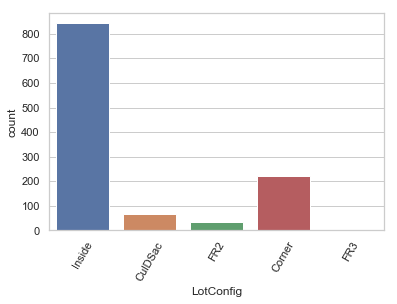

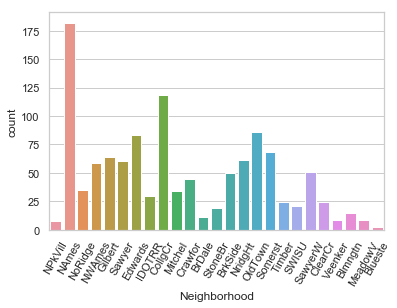

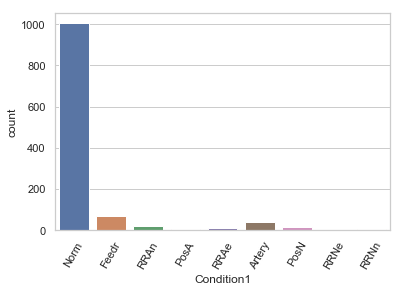

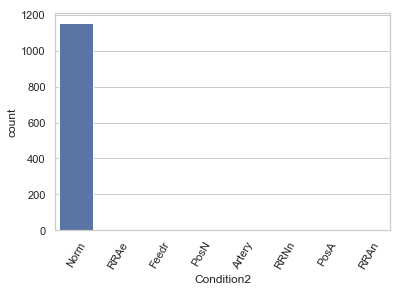

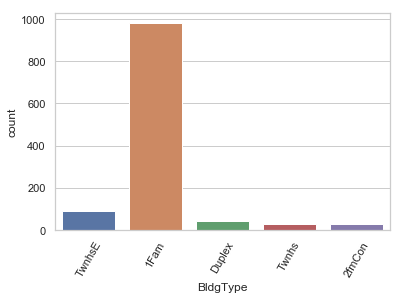

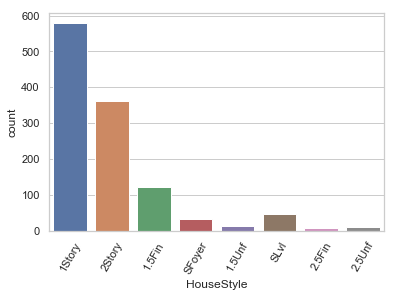

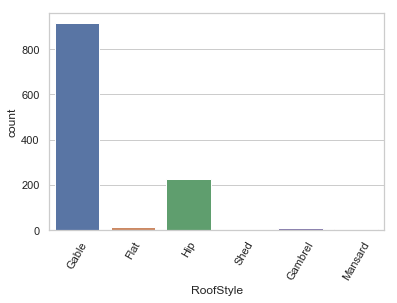

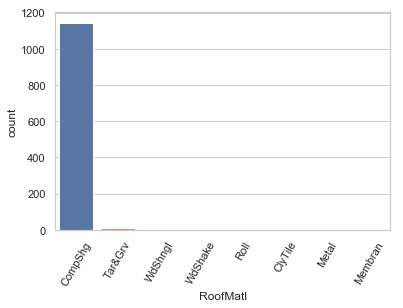

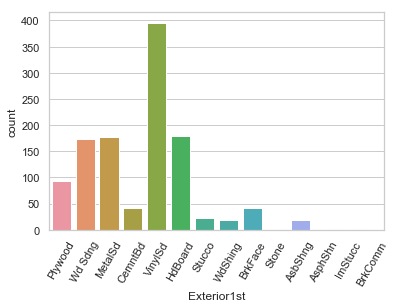

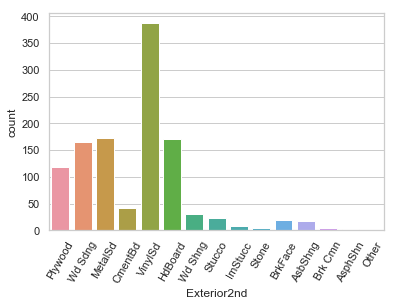

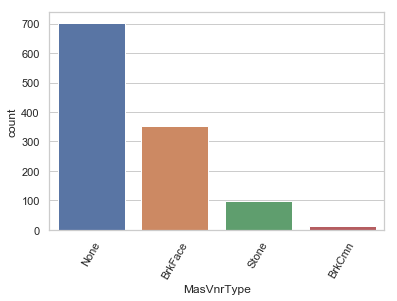

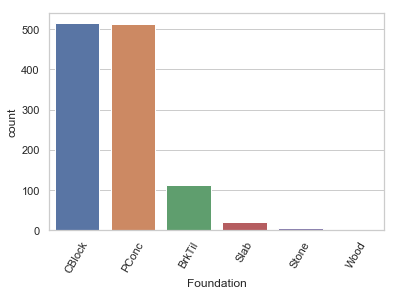

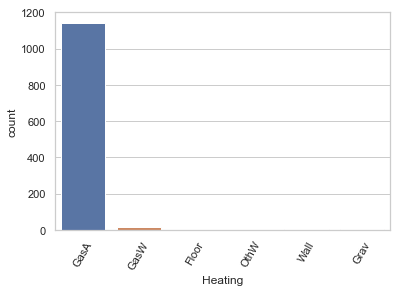

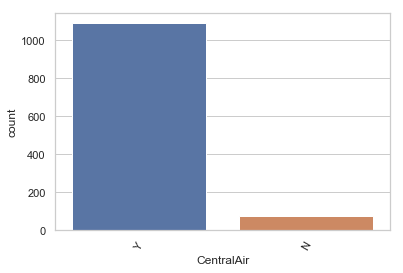

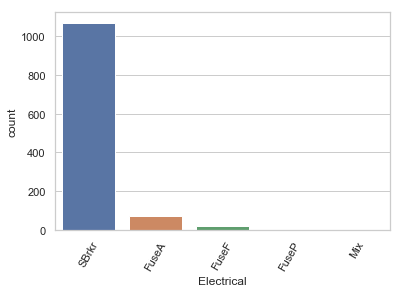

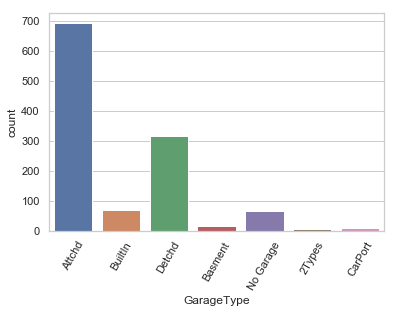

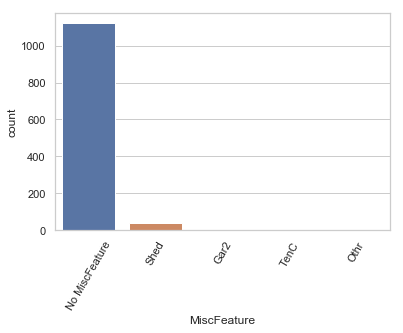

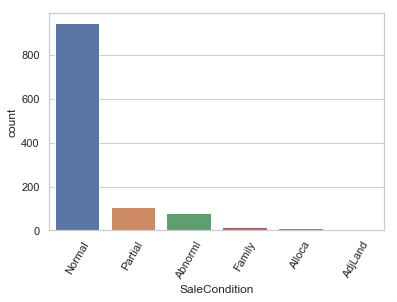

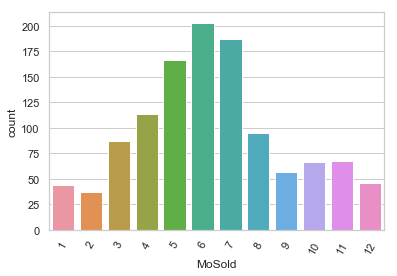

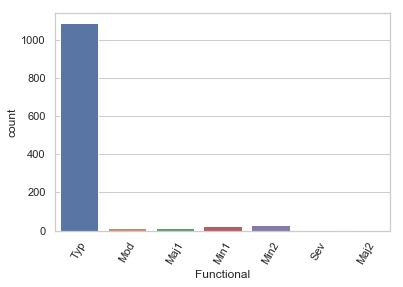

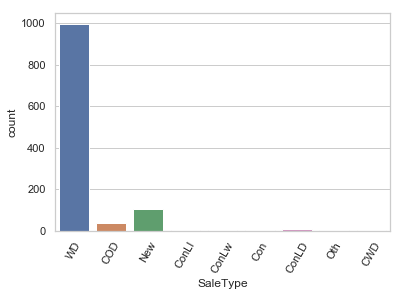

In [438]:
for i in noclist:
    plt.subplots()
    plot=sns.countplot(train[i])
    plot.set_xticklabels(plot.get_xticklabels(),rotation=60)

Dwelling type 20 is of more occurence than the other categories.

Majority of the houses belong to Residential Low Density Zone

All of the houses except for a very few have paved road access.

Majority of the houses have no alley access.

Majority of the houses are at level to the street.

All the houses are under the same category for feature 'Utilities'. So this column can be dropped.

Most houses were sold in the NorthAmes Neighborhood.

Houses with normal proximity to various conditions are more in number.

Majority of the houses are of single family detached type

50% of the houses are 1storey followed by 2storey at 30%. Majority of the houses are of Gable rooftype and are made of Standard (Composite) shingle material.

Exterior Covering on the house for majority of the houses is Vinyl siding.

Most of the houses foundation is laid with Cinder Block or Poured Concrete. Most of the houses have central Airconditioning.

Majority of the houses were sold in the June,July months.

In [439]:
train.drop(columns='Utilities',inplace=True)
test.drop(columns='Utilities',inplace=True)

In [440]:
noclist=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical', 'GarageType','MiscFeature','SaleCondition','MoSold','Functional','SaleType']

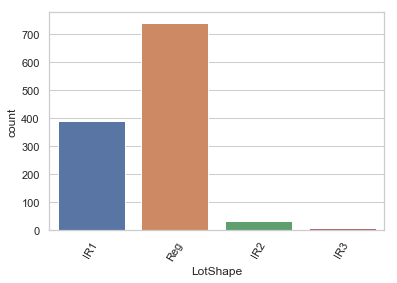

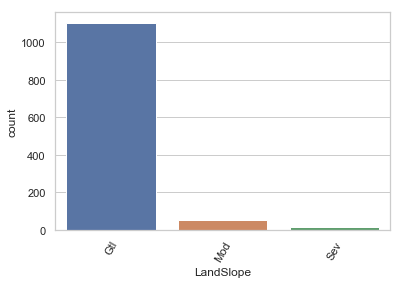

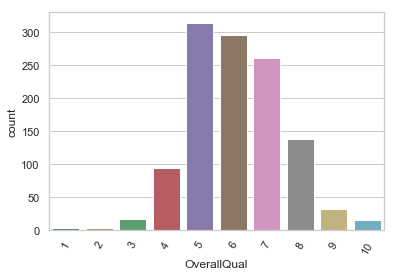

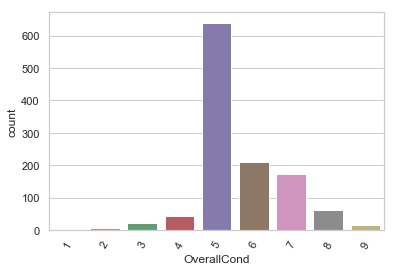

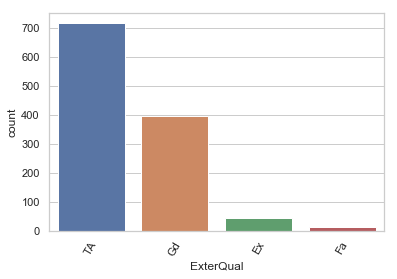

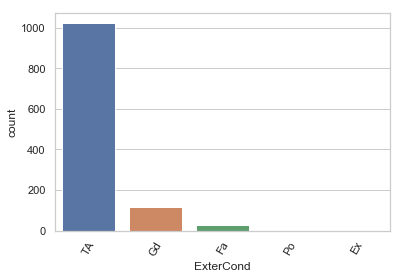

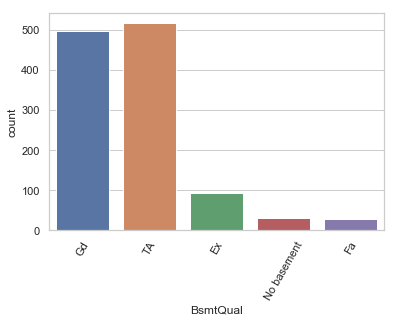

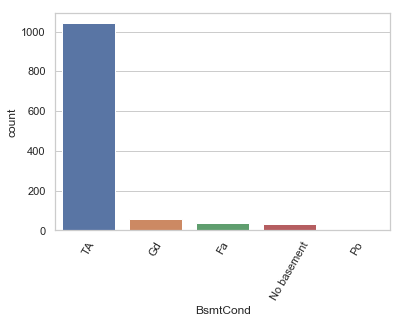

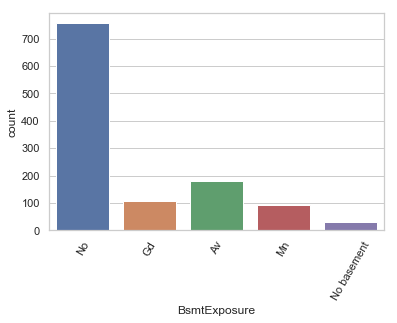

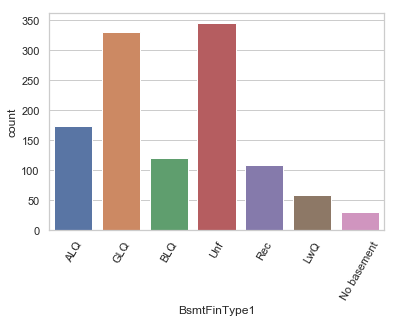

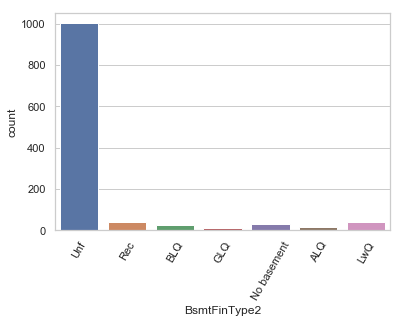

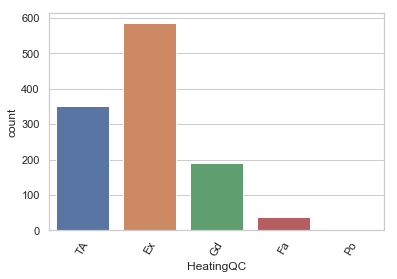

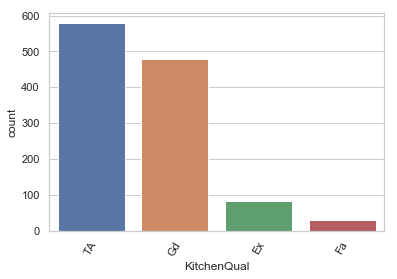

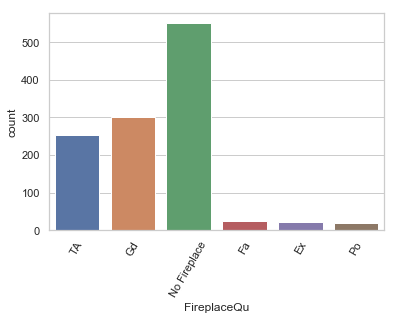

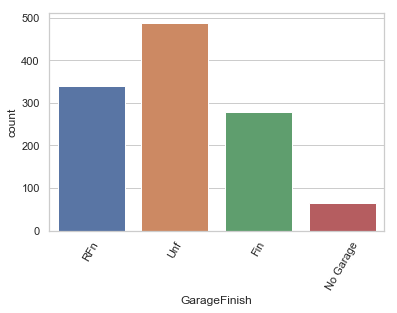

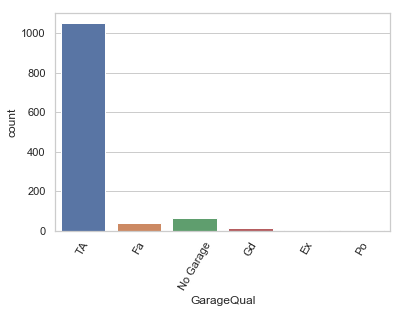

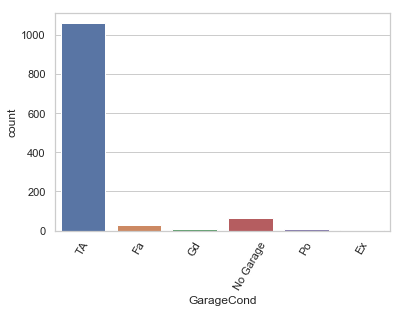

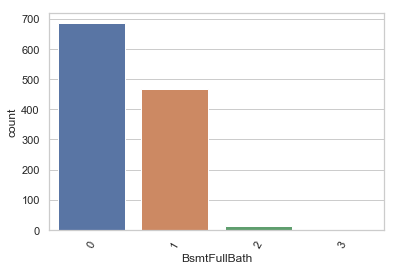

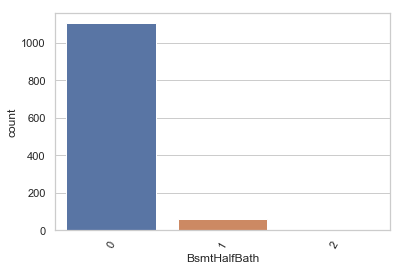

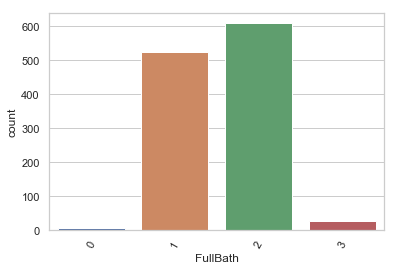

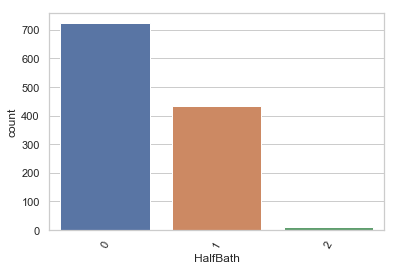

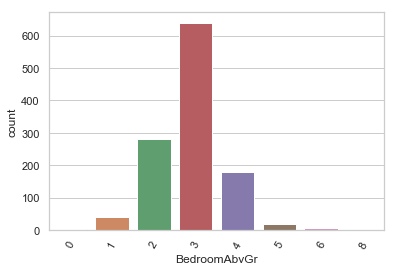

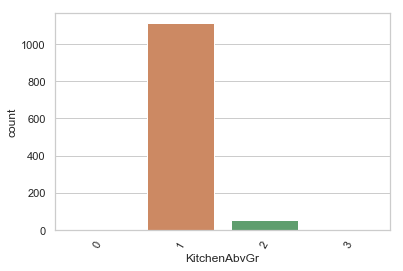

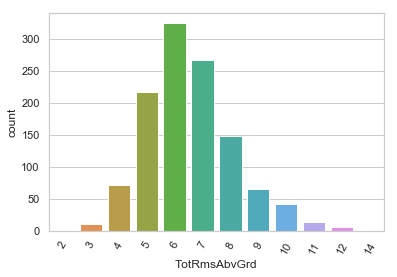

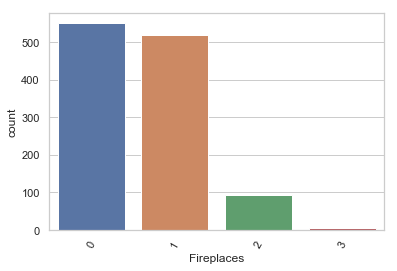

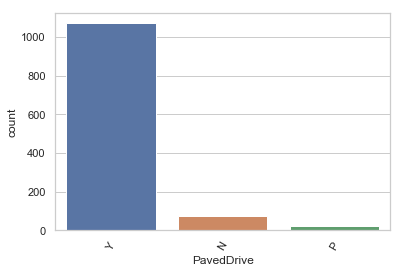

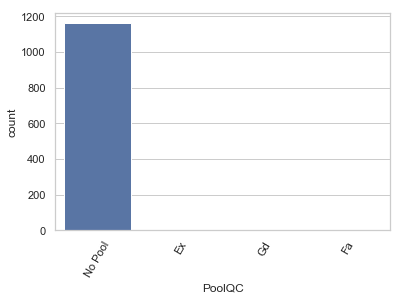

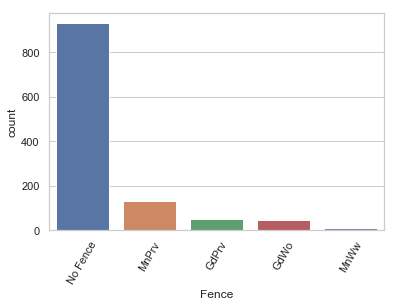

In [441]:
for i in oclist:
    plt.subplots()
    plot=sns.countplot(train[i])
    plot.set_xticklabels(plot.get_xticklabels(),rotation=60)

Majority of the houses had Regular Lot shape and Gentle slope. Most of the houses had overall quality in the range 5-7 on a scale of 1-10
and overall condition 5.

Majority of the houses had average external condition, average and good basement quality, average basement condition.

Most of the houses had either unfinished basement or Good quality basement. Heating quality in most of the houses is excellent.
Kitchenquality in most of the houses is average.

Most of the houses had no fireplace. Garage condition and quality are average and unfinished in most of the houses. Majority of the houses
had garagage capacity of 3.

Most of the houses had no pool and fence.

Relation between numerical variables and target variable SalePrice

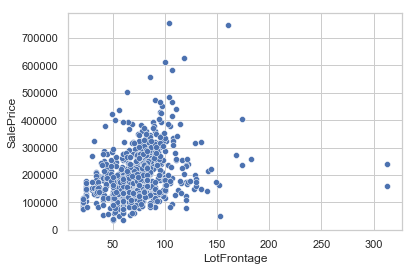

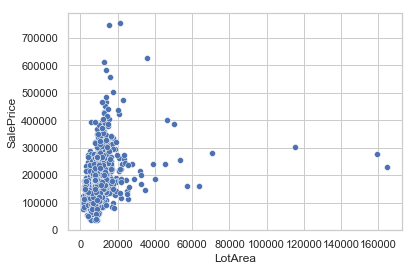

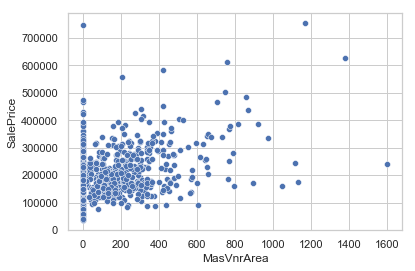

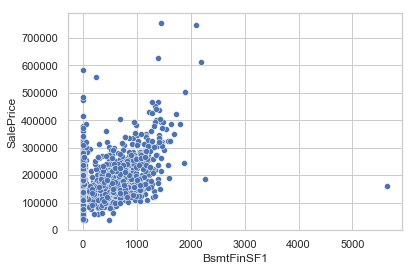

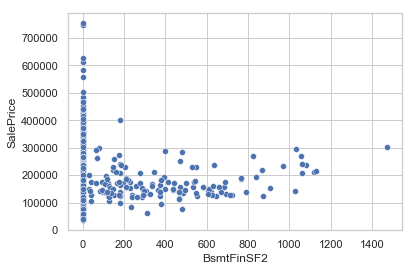

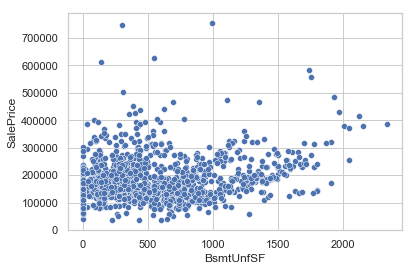

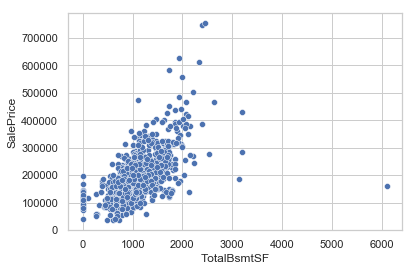

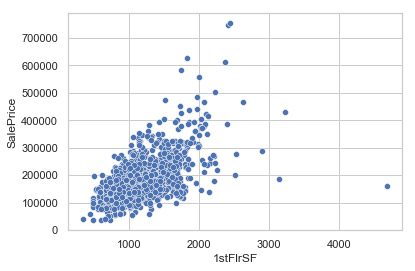

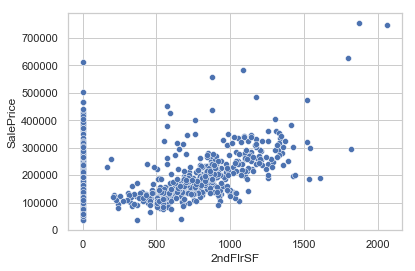

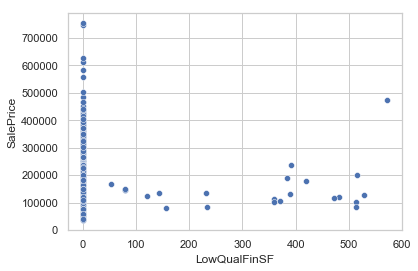

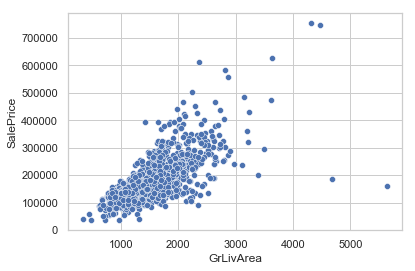

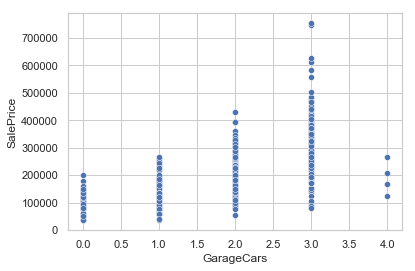

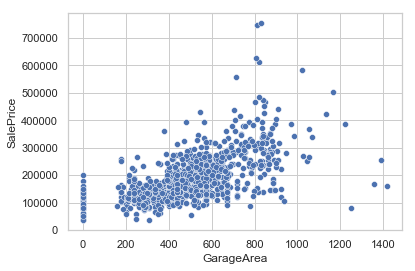

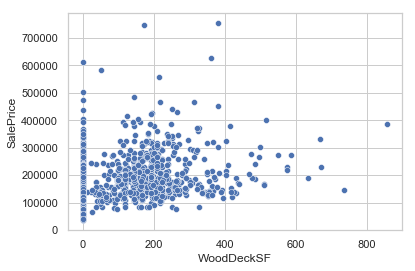

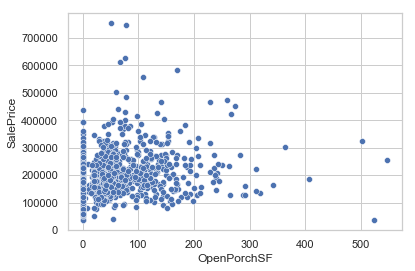

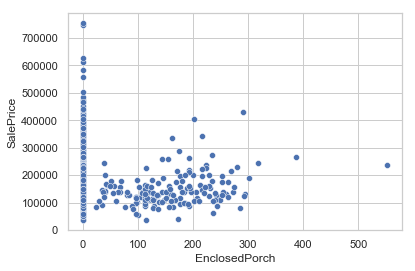

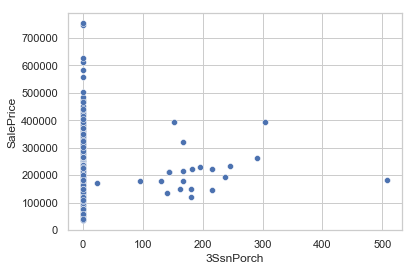

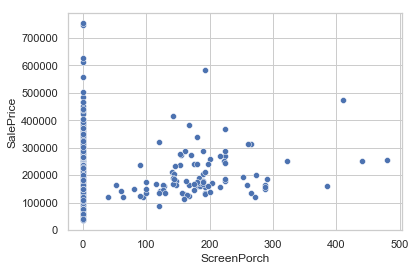

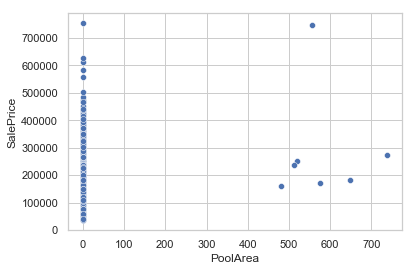

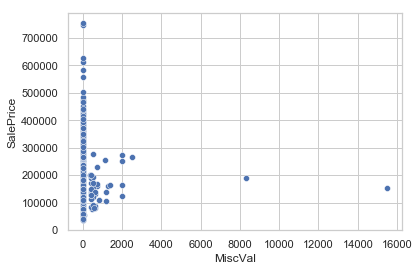

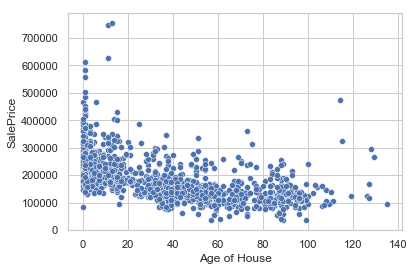

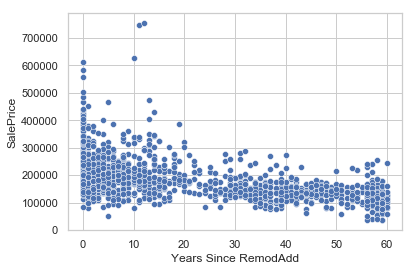

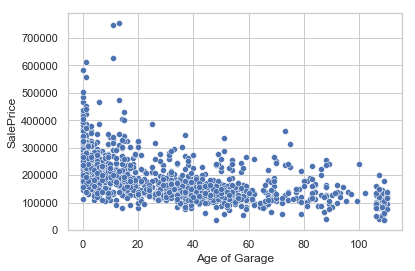

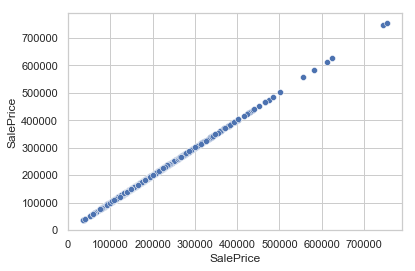

In [442]:
for i in nulist:
    plt.subplots()
    sns.scatterplot(x=train[i],y=train['SalePrice'])

From the above it can be seen that some of the features show a good positive relation with 'SalePrice'. 'Years Since RemodAdd',
'Age of House' show a negative relation with Saleprice. It can be seen that as the age of the house increases the price decreases accounting
for depreciation. Same is the case with 'Years Since RemodAdd'. 'GarageArea','GrLivArea', '1stFlrSF','2ndFlrSF', 'TotalBsmtSF' exhibit
a good positive relation with SalePrice. The other factors also had an effect on SalePrice to some extent.



In [443]:
catlist=noclist+oclist

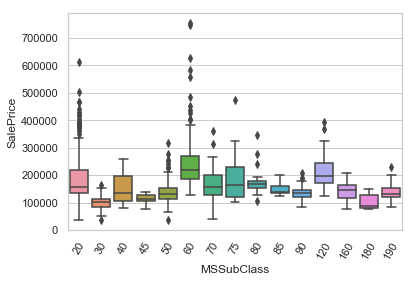

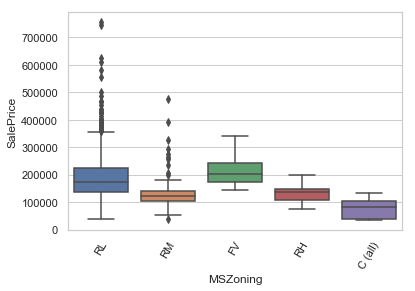

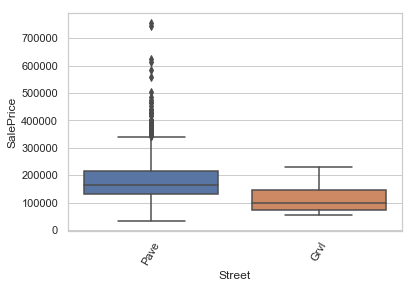

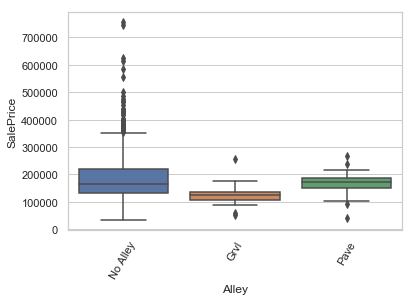

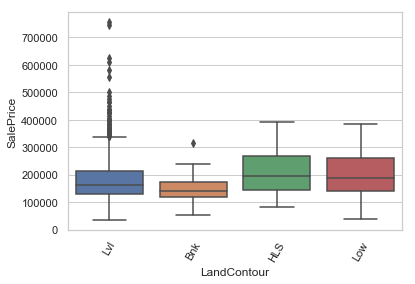

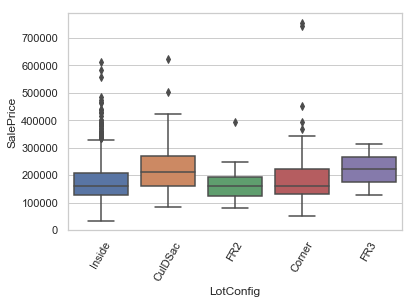

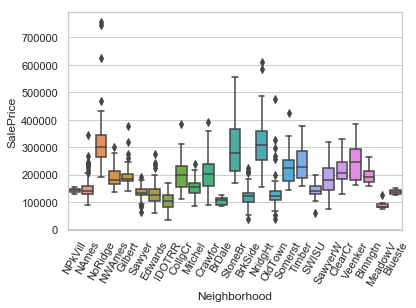

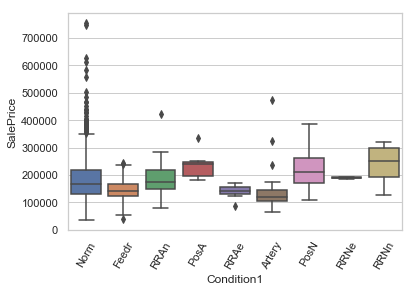

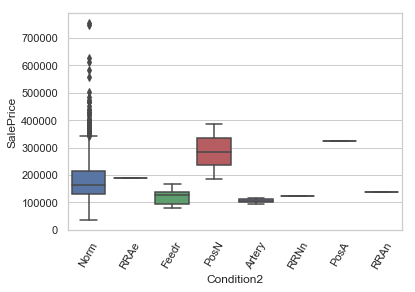

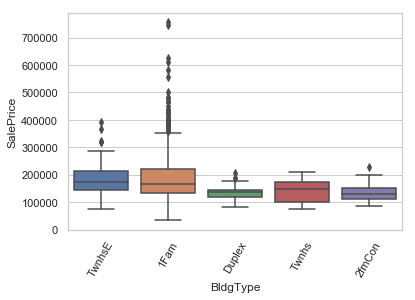

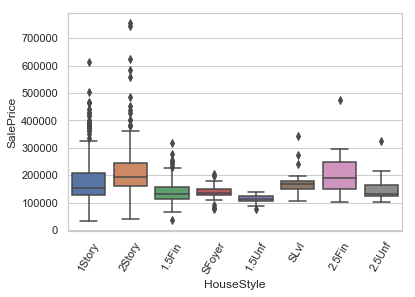

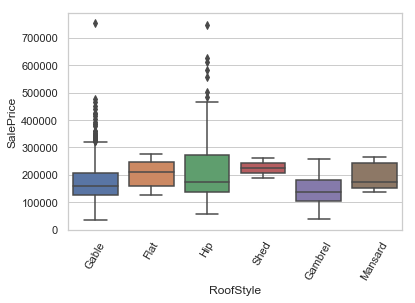

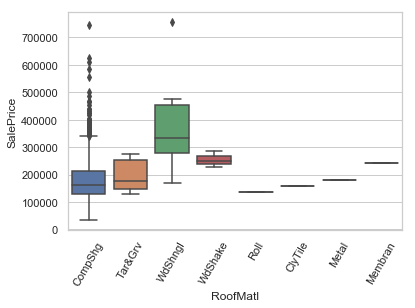

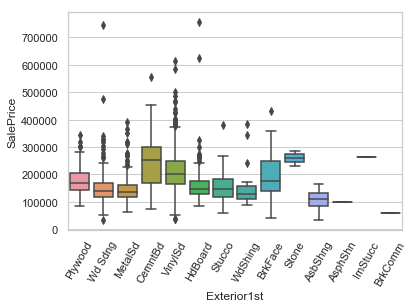

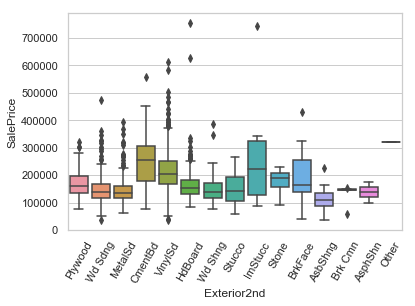

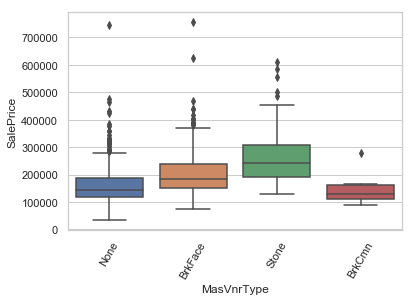

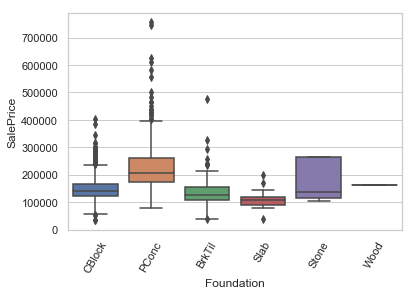

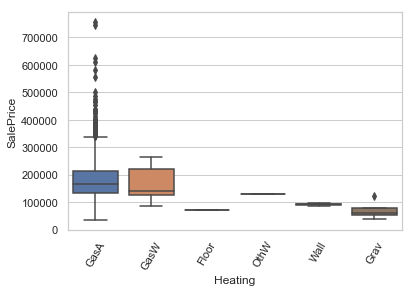

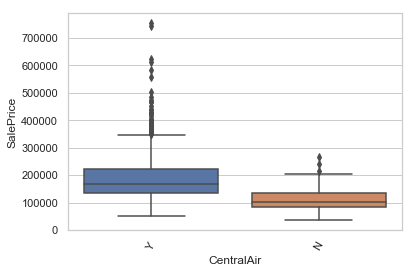

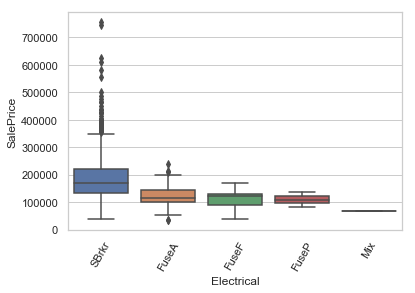

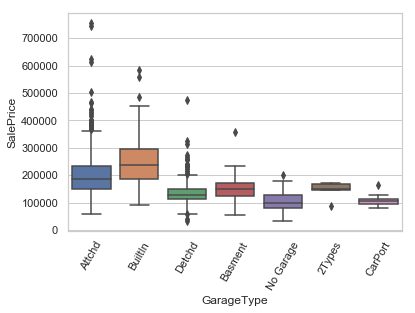

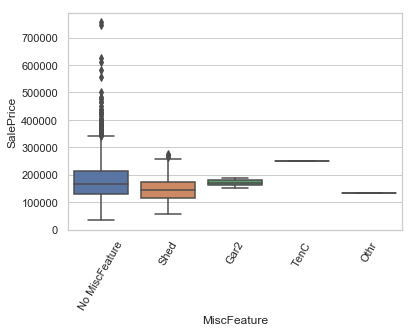

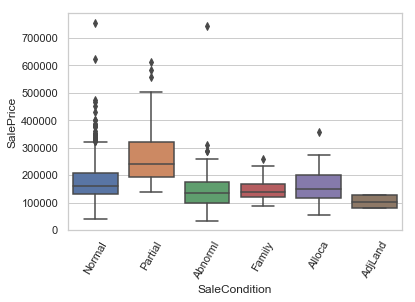

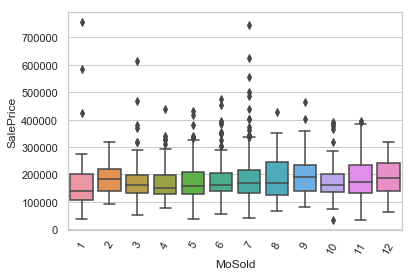

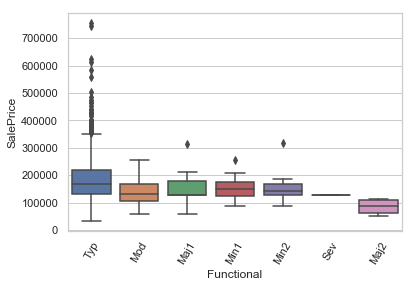

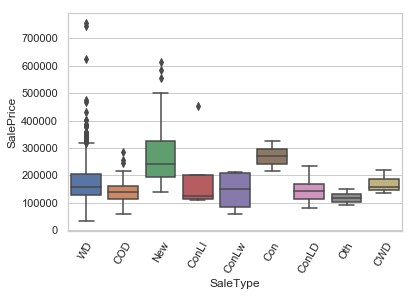

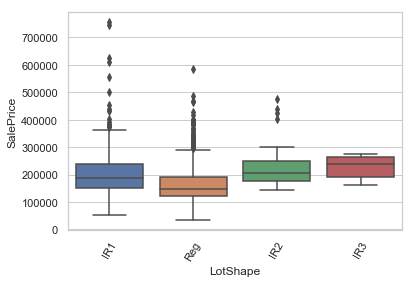

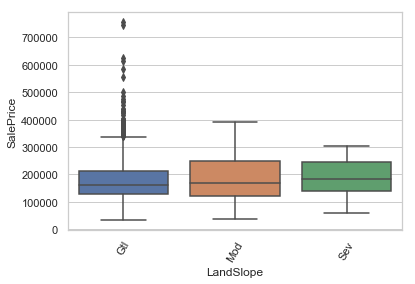

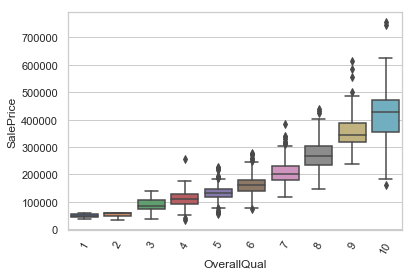

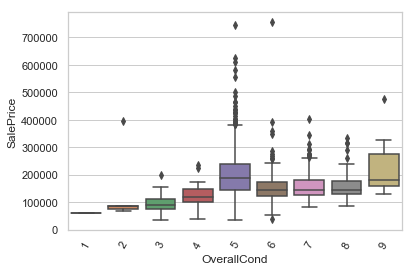

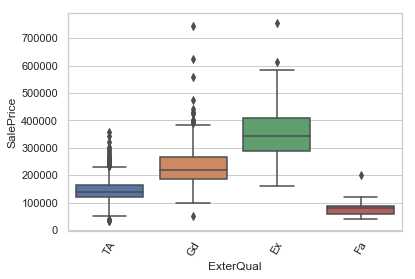

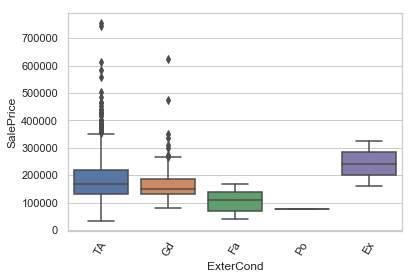

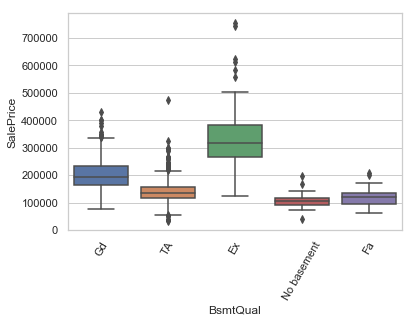

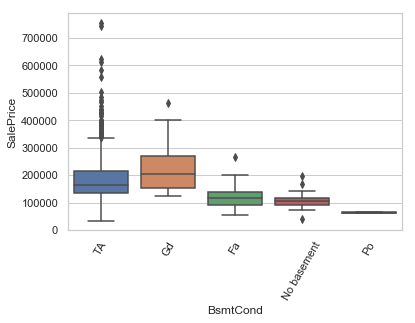

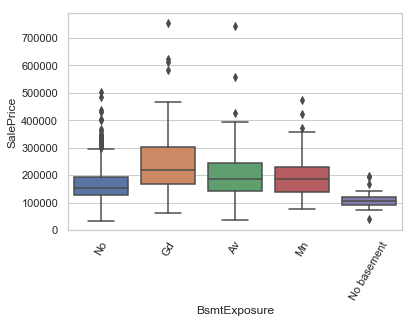

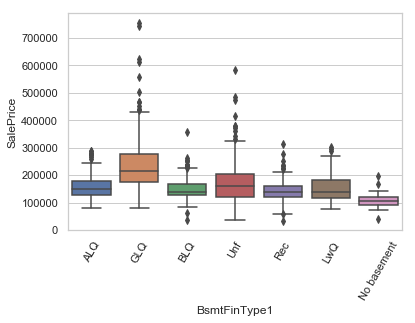

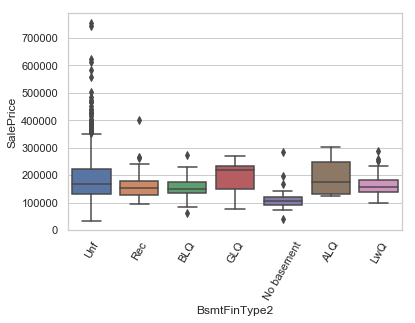

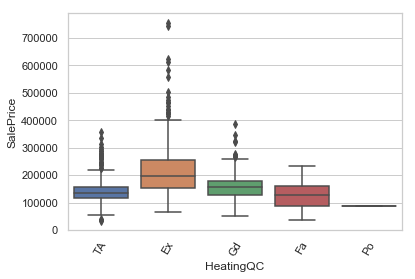

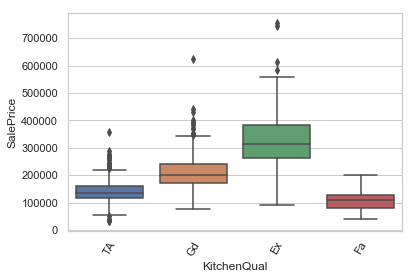

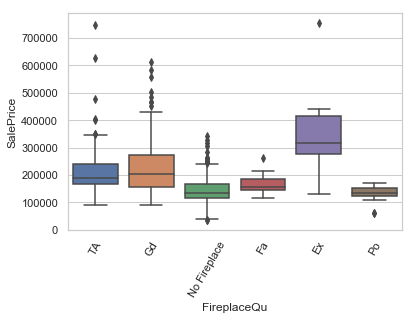

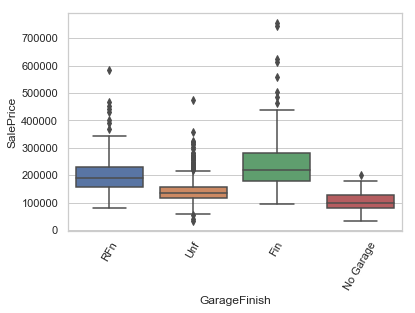

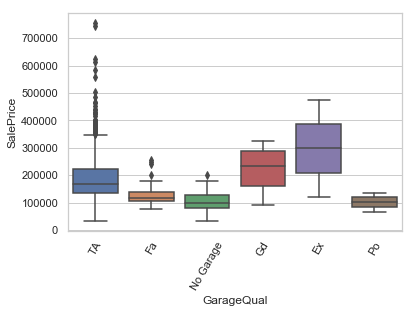

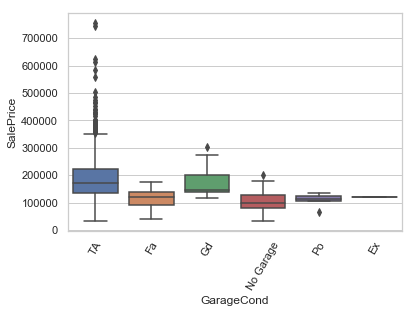

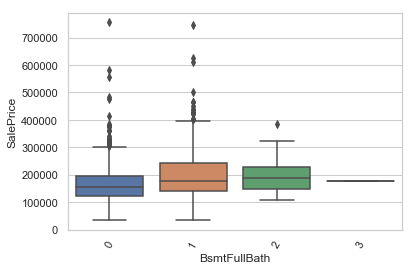

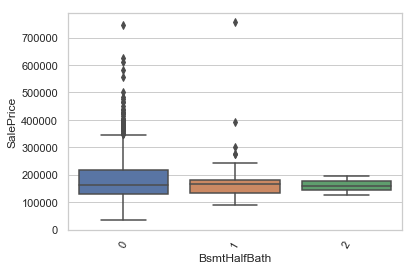

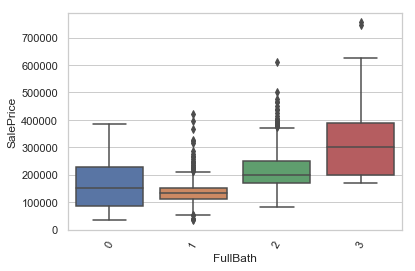

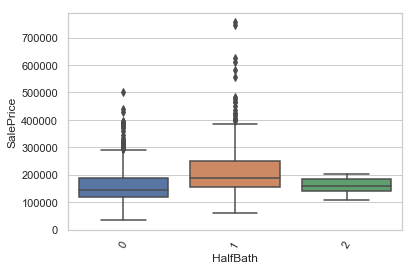

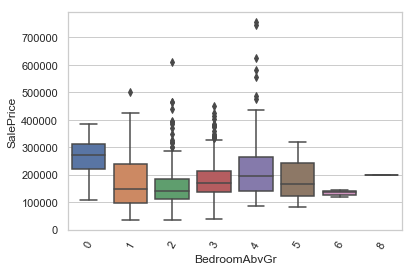

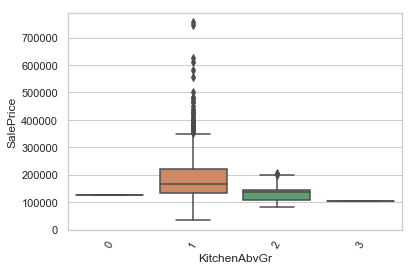

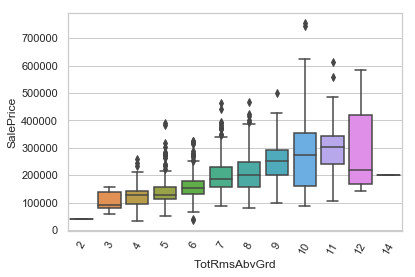

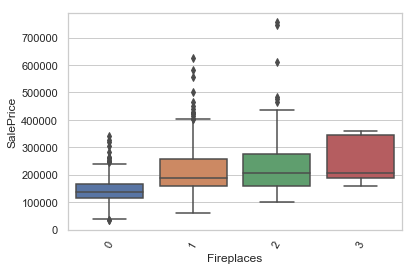

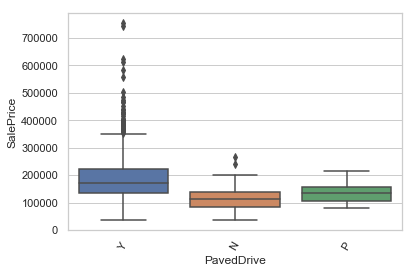

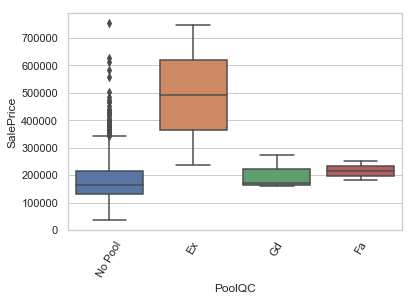

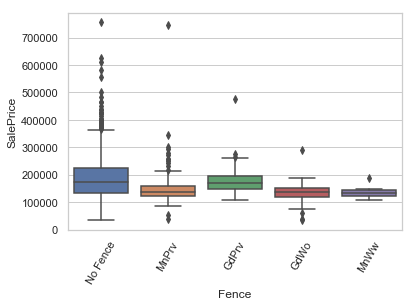

In [444]:
for i in catlist:
    plt.subplots()
    plot=sns.boxplot(x=i,y='SalePrice',data=train)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=60)

Houses with '2 Storey 1946 and newer style' subclass, 'Floating Village Residential' zoning classification have a higher mean price than others as 
do houses with 'SaleCondition' Partial(Home not completed when assessed, new homes), 'ExterQual' excellent, excellent BsmtQual,excellent 'KitchenQual',
excellent 'FireplaceQu', 3 'GarageCars' (capacity), excellent 'PoolQC'and houses with 'CentralAir'. 

There is little variation in mean SalePrice between houses with different 'Street', 'Alley','LandContour','BldgType','HouseStyle',
'RoofStyle','RoofMatl' 'LotShape','TotRmsAbvGrd' and other features.

Mean SalePrice is much higher for houses with 10 'OverallQual', houses with 3 'FullBath'.

There is not much variation in price with 'MoSold'

There is distribution of prices among Neighborhoods.

# Correlation among the Numerical Variables

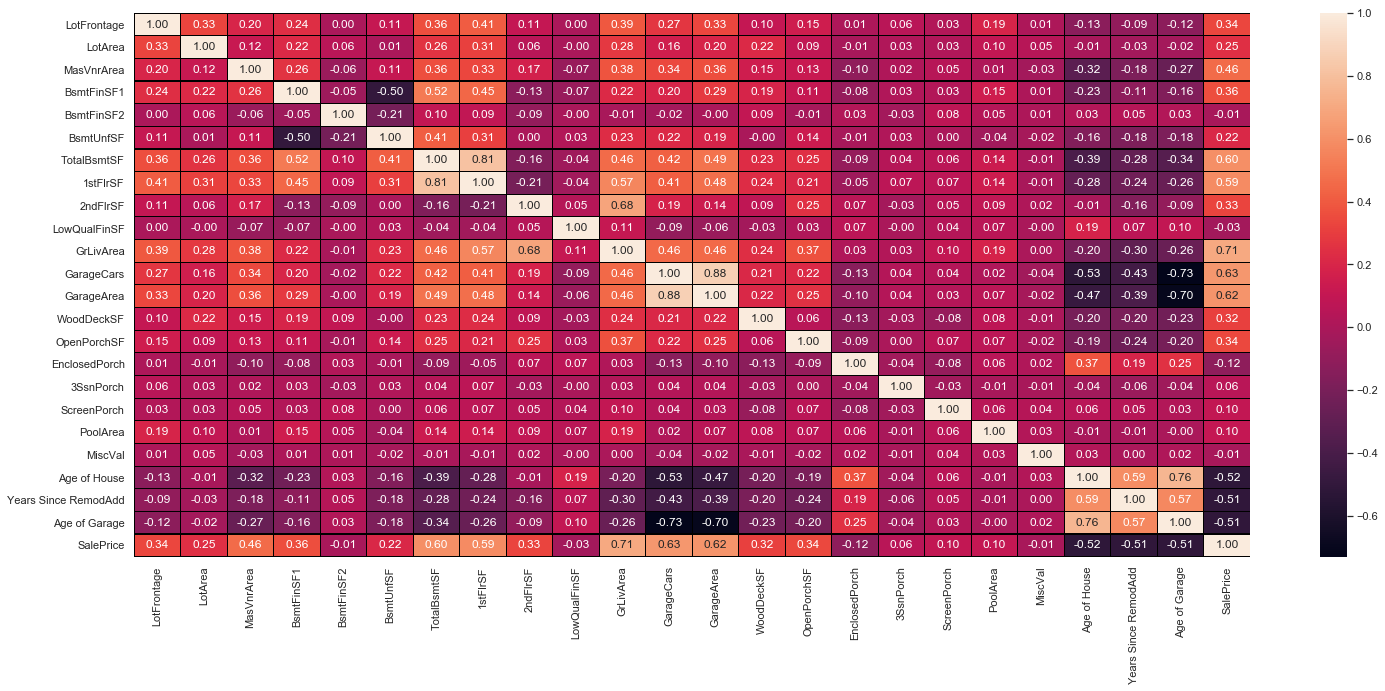

In [445]:
plt.figure(figsize=(25,10))
sns.heatmap(train[nulist].corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

From the Heatmap, it can be seen that 'MiscVal' has a very low correlation with SalePrice. Moreover around 96% of the houses dont have Miscfeature.
So these columns can be dropped.

'GrLivArea' has the highest correlation with SalePrice ,0.71. As expected 'Age of Houses' and 'Years Since RemodAdd' have a strong negative correlation with SalePrice.

'TotalBsmtSF', '1stFlrSF', 'GarageArea' are some of the features exhibiting strong positive correlation with SalePrice


In [446]:
train.drop(columns=['MiscFeature','MiscVal'],inplace=True)
test.drop(columns=['MiscFeature','MiscVal'],inplace=True)

In [447]:
noclist=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical', 'GarageType','SaleCondition','MoSold','Functional','SaleType']
oclist=['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'PavedDrive','PoolQC','Fence']
nulist=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']

In [448]:
len(nulist)

23

In [449]:
train.shape

(1168, 76)

In [450]:
test.shape

(292, 75)

# Outlier Removal

In [451]:
from scipy.stats import zscore
z=np.abs(zscore(train[nulist]))
df_new=train[(z<3).all(axis=1)]

In [452]:
df_new.shape

(932, 76)

In [453]:
(11168-932)/932

10.982832618025752

11% Dataloss is not advisable. Log Transformation can remove the outliers but there are zero values in many columns.
So inorder to handle the outliers some of the numerical features can be converted to categorical features.

In [454]:
train['MasVnrArea'].describe()

count    1168.000000
mean      101.696918
std       182.218483
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

It can be seen that 'MasVnrArea' has many zero values. This results in many outliers in the column. By binning the values convert into 
categorical column.

In [455]:
train.loc[train['MasVnrArea']>0,'MasVnrArea'].describe()

count     469.000000
mean      253.266525
std       210.538746
min         1.000000
25%       112.000000
50%       200.000000
75%       320.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [456]:
train[train['MasVnrArea']==1]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
32           90       RL    74.552632    18890   Pave  No Alley      IR1   
975          20       RL    70.000000    10150   Pave  No Alley      Reg   

    LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
32          Lvl    Inside       Gtl       Sawyer      Feedr       RRAe   
975         Lvl    Inside       Gtl        NAmes      Feedr       Norm   

    BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
32    Duplex     1.5Fin            5            5      Shed  CompShg   
975     1Fam     1Story            5            5     Gable  CompShg   

    Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
32      Plywood     Plywood       None         1.0        TA        TA   
975     Wd Sdng     Wd Sdng       None         1.0        TA        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
32      CBlock       Gd       TA           No          GLQ         498   
975     CBlock       TA       TA           No          Rec         456   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
32           Rec         211        652         1361    GasA        Ex   
975          Unf           0        456          912    GasA        Ex   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
32           Y      SBrkr      1361      1259             0       2620   
975          Y      FuseA       912         0             0        912   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
32              0             0         2         2             4   
975             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
32              2          TA            12        Typ           1   
975             1          TA             5        Typ           0   

      FireplaceQu GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
32             TA    BuiltIn          RFn           2         600         TA   
975  No Fireplace     Attchd          RFn           1         275         TA   

    GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
32          TA          N         155           24            145          0   
975         TA          Y           0            0              0          0   

     ScreenPorch  PoolArea   PoolQC     Fence  MoSold SaleType SaleCondition  \
32             0         0  No Pool  No Fence       8       WD        Normal   
975            0         0  No Pool  No Fence       7      COD        Normal   

     SalePrice  Age of House  Years Since RemodAdd  Age of Garage  
32      190000            30                    30           30.0  
975     114500            49                    49           49.0

It can be seen that 'MasVnrArea' =1 is a wrong entry, they should be zero corresponding to 'MasVnrType' None. Impute them with 0.

In [457]:
test[test['MasVnrArea']==1]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MoSold, SaleType, SaleCondition, Age of House, Years Since RemodAdd, Age of Garage]
Index: []

In [458]:
train.loc[train['MasVnrType']=='None','MasVnrArea']=0

Convert the 'MasVnrArea' to categorical feature by binning the values.

In [459]:
train['MasVnrArea']=pd.cut(train['MasVnrArea'],bins=[0,1,320,640,960,1280,1601],labels=[0,1,2,3,4,5],right=False)

In [460]:
train['MasVnrArea'].value_counts()

0    704
1    345
2     90
3     22
4      5
5      2
Name: MasVnrArea, dtype: int64

In [461]:
train[nulist].describe()

LotFrontage        LotArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     71.586288   10484.749144   444.726027    46.647260   569.721747   
std      22.899081    8957.442311   462.664785   163.520016   449.375525   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7621.500000     0.000000     0.000000   216.000000   
50%      72.197368    9522.500000   385.500000     0.000000   474.000000   
75%      81.000000   11515.500000   714.500000     0.000000   816.000000   
max     313.000000  164660.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   1061.095034  1169.860445   348.826199      6.380137  1525.066781   
std     442.272249   391.161983   439.696370     50.892844   528.042957   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     799.000000   892.000000     0.000000      0.000000  1143.250000   
50%    1005.500000  1096.500000     0.000000      0.000000  1468.500000   
75%    1291.500000  1392.000000   729.000000      0.000000  1795.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea  Age of House  \
count  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.639555    15.051370     3.448630     36.874144   
std      29.088867    55.080816    44.896939     30.193130   
min       0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000      8.000000   
50%       0.000000     0.000000     0.000000     36.000000   
75%       0.000000     0.000000     0.000000     54.000000   
max     508.000000   480.000000   738.000000    135.000000   

       Years Since RemodAdd  Age of Garage      SalePrice  
count           1168.000000    1168.000000    1168.000000  
mean              23.047089      33.895548  181477.005993  
std               20.782515      30.088690   79105.586863  
min                0.000000       0.000000   34900.000000  
25%                4.000000       7.000000  130375.000000  
50%               14.000000      30.000000  163995.000000  
75%               42.000000      50.000000  215000.000000  
max               60.000000     110.000000  755000.000000

In [462]:
test[nulist[0:-2]].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count   292.000000     292.000000   292.000000   292.000000   292.000000   
mean     67.146922   10645.143836   108.797945   439.294521    46.157534   
std      20.560924   13330.669795   174.845785   429.559675   152.467119   
min      21.000000    1526.000000     0.000000     0.000000     0.000000   
25%      57.000000    7200.000000     0.000000     0.000000     0.000000   
50%      66.500000    9200.000000     0.000000   369.500000     0.000000   
75%      78.000000   11658.750000   180.000000   700.500000     0.000000   
max     150.000000  215245.000000  1031.000000  1767.000000  1085.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count   292.000000   292.000000   292.000000   292.000000    292.000000   
mean    557.315068  1042.767123  1133.691781   339.657534      3.702055   
std     411.043768   424.561153   366.941919   424.278825     38.219527   
min       0.000000     0.000000   372.000000     0.000000      0.000000   
25%     255.000000   771.750000   858.000000     0.000000      0.000000   
50%     487.000000   971.000000  1047.500000     0.000000      0.000000   
75%     780.000000  1322.000000  1370.500000   717.000000      0.000000   
max    1935.000000  3094.000000  2402.000000  1589.000000    479.000000   

         GrLivArea  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   292.000000  292.000000   292.000000  292.000000   292.000000   
mean   1477.051370    1.729452   457.458904   86.397260    47.061644   
std     514.199429    0.754430   210.785591  121.898836    65.865449   
min     520.000000    0.000000     0.000000    0.000000     0.000000   
25%    1061.500000    1.000000   300.000000    0.000000     0.000000   
50%    1440.000000    2.000000   467.500000    0.000000    28.500000   
75%    1720.250000    2.000000   569.750000  149.250000    66.000000   
max    3447.000000    4.000000  1052.000000  728.000000   418.000000   

       EnclosedPorch   3SsnPorch  ScreenPorch  PoolArea  Age of House  \
count     292.000000  292.000000   292.000000     292.0    292.000000   
mean       17.708904    2.489726    15.099315       0.0     35.243151   
std        51.892906   30.247488    58.483473       0.0     30.494309   
min         0.000000    0.000000     0.000000       0.0      0.000000   
25%         0.000000    0.000000     0.000000       0.0      6.750000   
50%         0.000000    0.000000     0.000000       0.0     32.000000   
75%         0.000000    0.000000     0.000000       0.0     53.250000   
max       330.000000  407.000000   396.000000       0.0    136.000000   

       Years Since RemodAdd  
count            292.000000  
mean              22.565068  
std               20.089470  
min                0.000000  
25%                4.000000  
50%               14.000000  
75%               39.250000  
max               60.000000

In [463]:
noclist=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical', 'GarageType','MiscFeature','SaleCondition','MoSold','Functional','SaleType']
oclist=['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageCars','PavedDrive','PoolQC','Fence','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']
nulist=['LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']

In [464]:
train.shape

(1168, 76)

In [465]:
test.shape

(292, 75)

Similarly convert 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea' into categorical features by binning.

In [466]:
conlist=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

In [467]:
train[conlist].describe()

BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    444.726027    46.647260   569.721747  1061.095034   348.826199   
std     462.664785   163.520016   449.375525   442.272249   439.696370   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   216.000000   799.000000     0.000000   
50%     385.500000     0.000000   474.000000  1005.500000     0.000000   
75%     714.500000     0.000000   816.000000  1291.500000   729.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000  2065.000000   

       LowQualFinSF   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count   1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean       6.380137   476.860445    96.206336    46.559932      23.015411   
std       50.892844   214.466769   126.158988    66.381023      63.191089   
min        0.000000     0.000000     0.000000     0.000000       0.000000   
25%        0.000000   338.000000     0.000000     0.000000       0.000000   
50%        0.000000   480.000000     0.000000    24.000000       0.000000   
75%        0.000000   576.000000   171.000000    70.000000       0.000000   
max      572.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea  
count  1168.000000  1168.000000  1168.000000  
mean      3.639555    15.051370     3.448630  
std      29.088867    55.080816    44.896939  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max     508.000000   480.000000   738.000000

In [468]:
test[conlist].describe()

BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    439.294521    46.157534   557.315068  1042.767123   339.657534   
std     429.559675   152.467119   411.043768   424.561153   424.278825   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000   255.000000   771.750000     0.000000   
50%     369.500000     0.000000   487.000000   971.000000     0.000000   
75%     700.500000     0.000000   780.000000  1322.000000   717.000000   
max    1767.000000  1085.000000  1935.000000  3094.000000  1589.000000   

       LowQualFinSF   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count    292.000000   292.000000  292.000000   292.000000     292.000000   
mean       3.702055   457.458904   86.397260    47.061644      17.708904   
std       38.219527   210.785591  121.898836    65.865449      51.892906   
min        0.000000     0.000000    0.000000     0.000000       0.000000   
25%        0.000000   300.000000    0.000000     0.000000       0.000000   
50%        0.000000   467.500000    0.000000    28.500000       0.000000   
75%        0.000000   569.750000  149.250000    66.000000       0.000000   
max      479.000000  1052.000000  728.000000   418.000000     330.000000   

        3SsnPorch  ScreenPorch  PoolArea  
count  292.000000   292.000000     292.0  
mean     2.489726    15.099315       0.0  
std     30.247488    58.483473       0.0  
min      0.000000     0.000000       0.0  
25%      0.000000     0.000000       0.0  
50%      0.000000     0.000000       0.0  
75%      0.000000     0.000000       0.0  
max    407.000000   396.000000       0.0

In [469]:
for i in conlist:
    b=train[i].max()/5
    bins=[0,1,b,2*b,3*b,4*b,5*b+1]
    train[i]=pd.cut(train[i],bins=bins,labels=[0,1,2,3,4,5],right=False)

In [470]:
for i in conlist:
    print(train[i].value_counts())

1    696
0    375
2     95
5      1
3      1
4      0
Name: BsmtFinSF1, dtype: int64
0    1032
1      66
2      37
3      22
4      10
5       1
Name: BsmtFinSF2, dtype: int64
1    481
2    370
3    147
0     97
4     62
5     11
Name: BsmtUnfSF, dtype: int64
1    792
2    339
0     30
3      6
5      1
4      0
Name: TotalBsmtSF, dtype: int64
0    663
2    252
3    184
4     35
1     30
5      4
Name: 2ndFlrSF, dtype: int64
0    1145
5       7
4       7
1       4
2       3
3       2
Name: LowQualFinSF, dtype: int64
2    631
3    291
1    128
0     64
4     48
5      6
Name: GarageArea, dtype: int64
0    603
1    276
2    231
3     48
4      8
5      2
Name: WoodDeckSF, dtype: int64
0    531
1    463
2    143
3     25
5      3
4      3
Name: OpenPorchSF, dtype: int64
0    999
2     92
1     41
3     34
5      1
4      1
Name: EnclosedPorch, dtype: int64
0    1146
2      13
3       6
1       2
5       1
4       0
Name: 3SsnPorch, dtype: int64
0    1073
2      52
3      27
1       8
5   

In [471]:
for i in conlist[0:-2]:
    b=test[i].max()/5
    bins=[0,1,b,2*b,3*b,4*b,5*b+1]
    test[i]=pd.cut(test[i],bins=bins,labels=[0,1,2,3,4,5],right=False)

In [472]:
for i in conlist:
    print(test[i].value_counts())

0    92
2    76
1    52
3    43
4    23
5     6
Name: BsmtFinSF1, dtype: int64
0    261
3     11
2      8
1      7
4      4
5      1
Name: BsmtFinSF2, dtype: int64
1    102
2     94
3     48
0     21
4     16
5     11
Name: BsmtUnfSF, dtype: int64
2    183
3     75
1     19
4      7
0      7
5      1
Name: TotalBsmtSF, dtype: int64
0    166
3     69
2     30
4     18
5      7
1      2
Name: 2ndFlrSF, dtype: int64
0    289
5      2
3      1
4      0
2      0
1      0
Name: LowQualFinSF, dtype: int64
3    122
2    101
4     30
5     19
0     17
1      3
Name: GarageArea, dtype: int64
0    158
1     58
2     53
3     16
4      6
5      1
Name: WoodDeckSF, dtype: int64
0    125
1    109
2     38
3     13
4      6
5      1
Name: OpenPorchSF, dtype: int64
0    253
3     13
2     12
1      7
4      6
5      1
Name: EnclosedPorch, dtype: int64
0    290
5      1
4      1
3      0
2      0
1      0
Name: 3SsnPorch, dtype: int64
0      271
120      2
192      1
90       1
119      1
144      1
14

Now the numerical list is ['LotFrontage','LotArea','GrLivArea','GarageArea','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']

In [473]:
nulist1=['LotFrontage','LotArea','GrLivArea','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']

Update the categorical lists also.

'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF','PoolArea','MasVnrArea','GarageArea' can be taken as ordinal categorical variables.

'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch' can be taken as nominal categorical variables.

In [474]:
nulist1=['LotFrontage','LotArea','GrLivArea','Age of House','Years Since RemodAdd','Age of Garage','SalePrice']
noclist1=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical', 'GarageType','SaleCondition','MoSold','Functional','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch','MasVnrArea','SaleType']
oclist1=['LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea','PavedDrive','PoolQC','Fence','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF','PoolArea']


Updated numerical features still have outliers. Try applying Log Transformation on these.

In [475]:
train[nulist1].describe()

LotFrontage        LotArea    GrLivArea  Age of House  \
count  1168.000000    1168.000000  1168.000000   1168.000000   
mean     71.586288   10484.749144  1525.066781     36.874144   
std      22.899081    8957.442311   528.042957     30.193130   
min      21.000000    1300.000000   334.000000      0.000000   
25%      60.000000    7621.500000  1143.250000      8.000000   
50%      72.197368    9522.500000  1468.500000     36.000000   
75%      81.000000   11515.500000  1795.000000     54.000000   
max     313.000000  164660.000000  5642.000000    135.000000   

       Years Since RemodAdd  Age of Garage      SalePrice  
count           1168.000000    1168.000000    1168.000000  
mean              23.047089      33.895548  181477.005993  
std               20.782515      30.088690   79105.586863  
min                0.000000       0.000000   34900.000000  
25%                4.000000       7.000000  130375.000000  
50%               14.000000      30.000000  163995.000000  
75%               42.000000      50.000000  215000.000000  
max               60.000000     110.000000  755000.000000

In [476]:
test[nulist1[0:-2]].describe()

LotFrontage        LotArea    GrLivArea  Age of House  \
count   292.000000     292.000000   292.000000    292.000000   
mean     67.146922   10645.143836  1477.051370     35.243151   
std      20.560924   13330.669795   514.199429     30.494309   
min      21.000000    1526.000000   520.000000      0.000000   
25%      57.000000    7200.000000  1061.500000      6.750000   
50%      66.500000    9200.000000  1440.000000     32.000000   
75%      78.000000   11658.750000  1720.250000     53.250000   
max     150.000000  215245.000000  3447.000000    136.000000   

       Years Since RemodAdd  
count            292.000000  
mean              22.565068  
std               20.089470  
min                0.000000  
25%                4.000000  
50%               14.000000  
75%               39.250000  
max               60.000000

In [477]:
for i in ['LotFrontage','LotArea','GrLivArea','SalePrice']:
    train[i]=np.log(train[i])
    

In [478]:
for i in ['LotFrontage','LotArea','GrLivArea']:
    test[i]=np.log(test[i])
    

In [479]:
train[oclist1].head()

LotShape LandSlope  OverallQual  OverallCond ExterQual ExterCond BsmtQual  \
0      IR1       Gtl            6            5        TA        TA       Gd   
1      IR1       Mod            8            6        Gd        Gd       TA   
2      IR1       Gtl            7            5        Gd        TA       Gd   
3      IR1       Gtl            6            6        TA        TA       Gd   
4      IR1       Gtl            6            7        Gd        TA       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual  \
0       TA           No          ALQ          Unf        TA          TA   
1       Gd           Gd          ALQ          Rec        Ex          Gd   
2       TA           Av          GLQ          Unf        Ex          TA   
3       TA           No          BLQ          Unf        Ex          TA   
4       TA           No          ALQ          Unf        Gd          Gd   

  FireplaceQu GarageFinish GarageQual GarageCond  GarageCars GarageArea  \
0          TA          RFn         TA         TA           2          2   
1          TA          Unf         TA         TA           2          3   
2          TA          Unf         TA         TA           2          2   
3          TA          RFn         TA         TA           2          2   
4          TA          Fin         TA         TA           2          2   

  PavedDrive   PoolQC     Fence  BsmtFullBath  BsmtHalfBath  FullBath  \
0          Y  No Pool  No Fence             0             0         2   
1          Y  No Pool  No Fence             1             0         2   
2          Y  No Pool  No Fence             1             0         2   
3          Y  No Pool     MnPrv             0             0         2   
4          Y  No Pool  No Fence             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces BsmtFinSF1  \
0         0             2             1             5           1          1   
1         0             4             1             8           1          1   
2         1             3             1             8           1          1   
3         0             3             1             7           1          1   
4         0             3             1             8           1          2   

  BsmtFinSF2 BsmtUnfSF TotalBsmtSF 2ndFlrSF LowQualFinSF PoolArea  
0          0         3           1        0            0        0  
1          3         3           2        0            0        0  
2          0         1           1        3            0        0  
3          0         3           2        0            0        0  
4          0         1           2        0            0        0

In [480]:
descfile=open('C:/Users/dravi/Desktop/Lenovo backup/swathi/Flip Robo/Project-Housing_splitted/Data Description.txt')
print(descfile.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Encoding

Ordinal variables are to be ordinal encoded. Among the ordinal categorical variables,some of the variables are already in numerical form.
Leaving them as it is, encode the rest of the features.

In [481]:
train[oclist].head(10)

LotShape LandSlope  OverallQual  OverallCond ExterQual ExterCond BsmtQual  \
0      IR1       Gtl            6            5        TA        TA       Gd   
1      IR1       Mod            8            6        Gd        Gd       TA   
2      IR1       Gtl            7            5        Gd        TA       Gd   
3      IR1       Gtl            6            6        TA        TA       Gd   
4      IR1       Gtl            6            7        Gd        TA       Gd   
5      IR1       Gtl            7            5        Gd        TA       Gd   
6      IR1       Gtl            5            6        TA        TA       Gd   
7      Reg       Gtl            5            4        TA        TA       TA   
8      Reg       Gtl            5            7        TA        TA       TA   
9      Reg       Gtl            5            5        TA        TA       TA   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual  \
0       TA           No          ALQ          Unf        TA          TA   
1       Gd           Gd          ALQ          Rec        Ex          Gd   
2       TA           Av          GLQ          Unf        Ex          TA   
3       TA           No          BLQ          Unf        Ex          TA   
4       TA           No          ALQ          Unf        Gd          Gd   
5       TA           Av          Unf          Unf        Ex          Gd   
6       TA           No          ALQ          Unf        TA          TA   
7       TA           No          Rec          BLQ        Ex          TA   
8       TA           No          ALQ          GLQ        Ex          TA   
9       TA           No          Rec          Unf        TA          TA   

    FireplaceQu GarageFinish GarageQual GarageCond  GarageCars PavedDrive  \
0            TA          RFn         TA         TA           2          Y   
1            TA          Unf         TA         TA           2          Y   
2            TA          Unf         TA         TA           2          Y   
3            TA          RFn         TA         TA           2          Y   
4            TA          Fin         TA         TA           2          Y   
5            Gd          Fin         TA         TA           3          Y   
6            Gd          Unf         TA         TA           2          Y   
7            TA          RFn         TA         TA           2          Y   
8  No Fireplace          Unf         Fa         Fa           2          Y   
9  No Fireplace          Unf         TA         TA           1          Y   

    PoolQC     Fence  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  No Pool  No Fence             0             0         2         0   
1  No Pool  No Fence             1             0         2         0   
2  No Pool  No Fence             1             0         2         1   
3  No Pool     MnPrv             0             0         2         0   
4  No Pool  No Fence             0             1         2         0   
5  No Pool  No Fence             0             0         2         1   
6  No Pool  No Fence             1             0         1         1   
7  No Pool     GdPrv             1             0         2         0   
8  No Pool     GdPrv             1             0         1         0   
9  No Pool  No Fence             0             0         1         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  
0             2             1             5           1  
1             4             1             8           1  
2             3             1             8           1  
3             3             1             7           1  
4             3             1             8           1  
5             4             1             9           1  
6             3             1             5           1  
7             3             1             8           1  
8             2             1             6           0  
9             2             1             6           0

In [482]:
from sklearn.preprocessing import OrdinalEncoder

Order of the categories can be specified in the parameters of OrdinalEncoder

In [483]:
train['LotShape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [484]:
oe=OrdinalEncoder(categories=[['IR3','IR2','IR1','Reg']])
train['LotShape']=oe.fit_transform(train['LotShape'].values.reshape(-1,1))

In [485]:
oe=OrdinalEncoder(categories=[['IR3','IR2','IR1','Reg']])
test['LotShape']=oe.fit_transform(test['LotShape'].values.reshape(-1,1))

In [486]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [487]:
oe=OrdinalEncoder()
train['LandSlope']=oe.fit_transform(train['LandSlope'].values.reshape(-1,1))

In [488]:
oe=OrdinalEncoder()
test['LandSlope']=oe.fit_transform(test['LandSlope'].values.reshape(-1,1))

In [489]:
train['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [490]:
oe=OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
train['ExterQual']=oe.fit_transform(train['ExterQual'].values.reshape(-1,1))
test['ExterQual']=oe.fit_transform(test['ExterQual'].values.reshape(-1,1))

In [491]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [492]:
oe=OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
train['ExterCond']=oe.fit_transform(train['ExterCond'].values.reshape(-1,1))
test['ExterCond']=oe.fit_transform(test['ExterCond'].values.reshape(-1,1))

In [493]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'No basement', 'Fa'], dtype=object)

In [494]:
oe=OrdinalEncoder(categories=[['No basement','Po','Fa','TA','Gd','Ex']])
train['BsmtQual']=oe.fit_transform(train['BsmtQual'].values.reshape(-1,1))
test['BsmtQual']=oe.fit_transform(test['BsmtQual'].values.reshape(-1,1))

In [495]:
train['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'No basement', 'Po'], dtype=object)

In [496]:
oe=OrdinalEncoder(categories=[['No basement','Po','Fa','TA','Gd','Ex']])
train['BsmtCond']=oe.fit_transform(train['BsmtCond'].values.reshape(-1,1))
test['BsmtCond']=oe.fit_transform(test['BsmtCond'].values.reshape(-1,1))

In [497]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', 'No basement'], dtype=object)

In [498]:
oe=OrdinalEncoder(categories=[['No basement','No','Mn','Av','Gd']])
train['BsmtExposure']=oe.fit_transform(train['BsmtExposure'].values.reshape(-1,1))
test['BsmtExposure']=oe.fit_transform(test['BsmtExposure'].values.reshape(-1,1))

In [499]:
train['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', 'No basement'],
      dtype=object)

In [500]:
oe=OrdinalEncoder(categories=[['No basement','Unf','LwQ','BLQ','Rec','ALQ','GLQ']])
train['BsmtFinType1']=oe.fit_transform(train['BsmtFinType1'].values.reshape(-1,1))
test['BsmtFinType1']=oe.fit_transform(test['BsmtFinType1'].values.reshape(-1,1))

In [501]:
train['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', 'No basement', 'ALQ', 'LwQ'],
      dtype=object)

In [502]:
oe=OrdinalEncoder(categories=[['No basement','Unf','LwQ','BLQ','Rec','ALQ','GLQ']])
train['BsmtFinType2']=oe.fit_transform(train['BsmtFinType2'].values.reshape(-1,1))
test['BsmtFinType2']=oe.fit_transform(test['BsmtFinType2'].values.reshape(-1,1))

In [503]:
train['HeatingQC'].unique()

array(['TA', 'Ex', 'Gd', 'Fa', 'Po'], dtype=object)

In [504]:
oe=OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
train['HeatingQC']=oe.fit_transform(train['HeatingQC'].values.reshape(-1,1))
test['HeatingQC']=oe.fit_transform(test['HeatingQC'].values.reshape(-1,1))

In [505]:
train['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [506]:
oe=OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
train['KitchenQual']=oe.fit_transform(train['KitchenQual'].values.reshape(-1,1))
test['KitchenQual']=oe.fit_transform(test['KitchenQual'].values.reshape(-1,1))

In [507]:
train['FireplaceQu'].unique()

array(['TA', 'Gd', 'No Fireplace', 'Fa', 'Ex', 'Po'], dtype=object)

In [508]:
oe=OrdinalEncoder(categories=[['No Fireplace','Po','Fa','TA','Gd','Ex']])
train['FireplaceQu']=oe.fit_transform(train['FireplaceQu'].values.reshape(-1,1))
test['FireplaceQu']=oe.fit_transform(test['FireplaceQu'].values.reshape(-1,1))

In [509]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [510]:
oe=OrdinalEncoder(categories=[['No Garage','Unf','RFn','Fin']])
train['GarageFinish']=oe.fit_transform(train['GarageFinish'].values.reshape(-1,1))
test['GarageFinish']=oe.fit_transform(test['GarageFinish'].values.reshape(-1,1))

In [511]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'No Garage', 'Gd', 'Ex', 'Po'], dtype=object)

In [512]:
oe=OrdinalEncoder(categories=[['No Garage','Po','Fa','TA','Gd','Ex']])
train['GarageQual']=oe.fit_transform(train['GarageQual'].values.reshape(-1,1))
test['GarageQual']=oe.fit_transform(test['GarageQual'].values.reshape(-1,1))

In [513]:
train['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Po', 'Ex'], dtype=object)

In [514]:
oe=OrdinalEncoder(categories=[['No Garage','Po','Fa','TA','Gd','Ex']])
train['GarageCond']=oe.fit_transform(train['GarageCond'].values.reshape(-1,1))
test['GarageCond']=oe.fit_transform(test['GarageCond'].values.reshape(-1,1))

In [515]:
train['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [516]:
oe=OrdinalEncoder(categories=[['N','P','Y']])
train['PavedDrive']=oe.fit_transform(train['PavedDrive'].values.reshape(-1,1))
test['PavedDrive']=oe.fit_transform(test['PavedDrive'].values.reshape(-1,1))

In [517]:
train['PoolQC'].unique()

array(['No Pool', 'Ex', 'Gd', 'Fa'], dtype=object)

In [518]:
oe=OrdinalEncoder(categories=[['No Pool','Fa','TA','Gd','Ex']])
train['PoolQC']=oe.fit_transform(train['PoolQC'].values.reshape(-1,1))
test['PoolQC']=oe.fit_transform(test['PoolQC'].values.reshape(-1,1))

In [519]:
train['Fence'].unique()

array(['No Fence', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [520]:
oe=OrdinalEncoder(categories=[['No Fence','MnWw','MnPrv','GdWo','GdPrv']])
train['Fence']=oe.fit_transform(train['Fence'].values.reshape(-1,1))
test['Fence']=oe.fit_transform(test['Fence'].values.reshape(-1,1))

In [521]:
train[oclist1].head()

LotShape  LandSlope  OverallQual  OverallCond  ExterQual  ExterCond  \
0       2.0        0.0            6            5        2.0        2.0   
1       2.0        1.0            8            6        3.0        3.0   
2       2.0        0.0            7            5        3.0        2.0   
3       2.0        0.0            6            6        2.0        2.0   
4       2.0        0.0            6            7        3.0        2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
0       4.0       3.0           1.0           5.0           1.0        2.0   
1       3.0       4.0           4.0           5.0           4.0        4.0   
2       4.0       3.0           3.0           6.0           1.0        4.0   
3       4.0       3.0           1.0           3.0           1.0        4.0   
4       4.0       3.0           1.0           5.0           1.0        3.0   

   KitchenQual  FireplaceQu  GarageFinish  GarageQual  GarageCond  GarageCars  \
0          2.0          3.0           2.0         3.0         3.0           2   
1          3.0          3.0           1.0         3.0         3.0           2   
2          2.0          3.0           1.0         3.0         3.0           2   
3          2.0          3.0           2.0         3.0         3.0           2   
4          3.0          3.0           3.0         3.0         3.0           2   

  GarageArea  PavedDrive  PoolQC  Fence  BsmtFullBath  BsmtHalfBath  FullBath  \
0          2         2.0     0.0    0.0             0             0         2   
1          3         2.0     0.0    0.0             1             0         2   
2          2         2.0     0.0    0.0             1             0         2   
3          2         2.0     0.0    2.0             0             0         2   
4          2         2.0     0.0    0.0             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces BsmtFinSF1  \
0         0             2             1             5           1          1   
1         0             4             1             8           1          1   
2         1             3             1             8           1          1   
3         0             3             1             7           1          1   
4         0             3             1             8           1          2   

  BsmtFinSF2 BsmtUnfSF TotalBsmtSF 2ndFlrSF LowQualFinSF PoolArea  
0          0         3           1        0            0        0  
1          3         3           2        0            0        0  
2          0         1           1        3            0        0  
3          0         3           2        0            0        0  
4          0         1           2        0            0        0

All the Ordinal Categorical variables are encoded.

One Hot Encoder is to be used for encoding Nominal Categorical variables.

In [522]:
train[noclist1].head()

MSSubClass MSZoning Street     Alley LandContour LotConfig Neighborhood  \
0         120       RL   Pave  No Alley         Lvl    Inside      NPkVill   
1          20       RL   Pave  No Alley         Lvl    Inside        NAmes   
2          60       RL   Pave  No Alley         Lvl   CulDSac      NoRidge   
3          20       RL   Pave  No Alley         Lvl    Inside       NWAmes   
4          20       RL   Pave  No Alley         Lvl       FR2       NWAmes   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm   TwnhsE     1Story     Gable  CompShg     Plywood   
1       Norm       Norm     1Fam     1Story      Flat  Tar&Grv     Wd Sdng   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     MetalSd   
3       Norm       Norm     1Fam     1Story       Hip  CompShg     Plywood   
4       Norm       Norm     1Fam     1Story     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType Foundation Heating CentralAir Electrical GarageType  \
0     Plywood       None     CBlock    GasA          Y      SBrkr     Attchd   
1     Wd Sdng       None      PConc    GasA          Y      SBrkr     Attchd   
2     MetalSd       None      PConc    GasA          Y      SBrkr     Attchd   
3     Plywood    BrkFace     CBlock    GasA          Y      SBrkr     Attchd   
4     CmentBd      Stone     CBlock    GasA          Y      SBrkr     Attchd   

  SaleCondition  MoSold Functional WoodDeckSF OpenPorchSF EnclosedPorch  \
0        Normal       2        Typ          0           2             0   
1        Normal      10        Typ          1           2             0   
2        Normal       6        Typ          2           2             0   
3        Normal       1        Typ          0           2             0   
4        Normal       6        Typ          2           0             0   

  3SsnPorch ScreenPorch MasVnrArea SaleType  
0         0           0          0       WD  
1         0           3          0       WD  
2         0           0          0       WD  
3         0           0          2      COD  
4         0           0          1       WD

If the categories in a feature are 2 or less than 2 in number, they can be Label Encoded

In [523]:
list1=[]
for i in noclist1:
    if train[i].nunique()<=2:
        list1.append(i)

In [524]:
list1

['Street', 'CentralAir']

In [525]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Street']=le.fit_transform(train['Street'])
test['Street']=le.fit_transform(test['Street'])
train['CentralAir']=le.fit_transform(train['CentralAir'])
test['CentralAir']=le.fit_transform(test['CentralAir'])

In [526]:
train[noclist1].head()

MSSubClass MSZoning  Street     Alley LandContour LotConfig Neighborhood  \
0         120       RL       1  No Alley         Lvl    Inside      NPkVill   
1          20       RL       1  No Alley         Lvl    Inside        NAmes   
2          60       RL       1  No Alley         Lvl   CulDSac      NoRidge   
3          20       RL       1  No Alley         Lvl    Inside       NWAmes   
4          20       RL       1  No Alley         Lvl       FR2       NWAmes   

  Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st  \
0       Norm       Norm   TwnhsE     1Story     Gable  CompShg     Plywood   
1       Norm       Norm     1Fam     1Story      Flat  Tar&Grv     Wd Sdng   
2       Norm       Norm     1Fam     2Story     Gable  CompShg     MetalSd   
3       Norm       Norm     1Fam     1Story       Hip  CompShg     Plywood   
4       Norm       Norm     1Fam     1Story     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType Foundation Heating  CentralAir Electrical GarageType  \
0     Plywood       None     CBlock    GasA           1      SBrkr     Attchd   
1     Wd Sdng       None      PConc    GasA           1      SBrkr     Attchd   
2     MetalSd       None      PConc    GasA           1      SBrkr     Attchd   
3     Plywood    BrkFace     CBlock    GasA           1      SBrkr     Attchd   
4     CmentBd      Stone     CBlock    GasA           1      SBrkr     Attchd   

  SaleCondition  MoSold Functional WoodDeckSF OpenPorchSF EnclosedPorch  \
0        Normal       2        Typ          0           2             0   
1        Normal      10        Typ          1           2             0   
2        Normal       6        Typ          2           2             0   
3        Normal       1        Typ          0           2             0   
4        Normal       6        Typ          2           0             0   

  3SsnPorch ScreenPorch MasVnrArea SaleType  
0         0           0          0       WD  
1         0           3          0       WD  
2         0           0          0       WD  
3         0           0          2      COD  
4         0           0          1       WD

In [527]:
train_2cat=train[noclist1].loc[:,list1]
test_2cat=test[noclist1].loc[:,list1]

In [528]:
noclist1.remove('Street')

In [529]:
noclist1.remove('CentralAir')

In [530]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(train[noclist1])
cols=ohe.transform(train[noclist1]).toarray()
feature_names=ohe.get_feature_names(noclist1)
X_train=pd.DataFrame(cols,columns=feature_names).astype(int)

In [531]:
ohe.fit(test[noclist1])
cols=ohe.transform(test[noclist1]).toarray()
feature_names=ohe.get_feature_names(noclist1)
X_test=pd.DataFrame(cols,columns=feature_names).astype(int)

In [532]:
x_train=pd.concat([train_2cat,X_train],axis=1)
x_test=pd.concat([test_2cat,X_test],axis=1)

In [533]:
x_train.head()

Street  CentralAir  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
0       1           1              0              0              0   
1       1           1              1              0              0   
2       1           1              0              0              0   
3       1           1              1              0              0   
4       1           1              1              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               1   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Grvl  \
0            0            0            1            0           0   
1            0            0            1            0           0   
2            0            0            1            0           0   
3            0            0            1            0           0   
4            0            0            1            0           0   

   Alley_No Alley  Alley_Pave  LandContour_Bnk  LandContour_HLS  \
0               1           0                0                0   
1               1           0                0                0   
2               1           0                0                0   
3               1           0                0                0   
4               1           0                0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  1   
3                0                1                 0                  0   
4                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blmngtn  \
0              0              0                 1                     0   
1              0              0                 1                     0   
2              0              0                 0                     0   
3              0              0                 1                     0   
4              1              0                 0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0              

In [534]:
x_test.head()

Street  CentralAir  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
0       1           1              1              0              0   
1       1           1              0              0              0   
2       1           1              1              0              0   
3       1           1              0              0              0   
4       1           1              0              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               1   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_C (all)  \
0               0               0               0                 0   
1               0               0               0                 0   
2               0               0               0                 0   
3               0               0               0                 0   
4               0               0               0                 0   

   MSZoning_FV  MSZoning_RL  MSZoning_RM  Alley_Grvl  Alley_No Alley  \
0            0            1            0           0               1   
1            0            1            0           0               1   
2            0            1            0           0               1   
3            0            1            0           0               1   
4            0            1            0           0               1   

   Alley_Pave  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0           0                0                1                0   
1           0                0                0                0   
2           0                0                0                0   
3           0                1                0                0   
4           0                0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                0                 1                  0              0   
1                1                 0                  1              0   
2                1                 0                  0              0   
3                0                 0                  0              0   
4                1                 0                  1              0   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blmngtn  Neighborhood_BrDale  \
0              0                 0                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 1                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0    

In [535]:
train_final=pd.concat([train[nulist1],train[oclist1],x_train],axis=1)

In [536]:
train_final.head()

LotFrontage   LotArea  GrLivArea  Age of House  Years Since RemodAdd  \
0     3.516508  8.502689   6.864848            31                    31   
1     4.553877  9.671871   7.703910            37                    37   
2     4.521789  9.202308   7.607381            11                    10   
3     4.653960  9.371694   7.519692            33                    33   
4     4.400262  9.719264   7.379008            32                     9   

   Age of Garage  SalePrice  LotShape  LandSlope  OverallQual  OverallCond  \
0           30.0  11.759786       2.0        0.0            6            5   
1           37.0  12.498742       2.0        1.0            8            6   
2           10.0  12.505399       2.0        0.0            7            5   
3           33.0  12.154779       2.0        0.0            6            6   
4           32.0  12.278393       2.0        0.0            6            7   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        2.0        2.0       4.0       3.0           1.0           5.0   
1        3.0        3.0       3.0       4.0           4.0           5.0   
2        3.0        2.0       4.0       3.0           3.0           6.0   
3        2.0        2.0       4.0       3.0           1.0           3.0   
4        3.0        2.0       4.0       3.0           1.0           5.0   

   BsmtFinType2  HeatingQC  KitchenQual  FireplaceQu  GarageFinish  \
0           1.0        2.0          2.0          3.0           2.0   
1           4.0        4.0          3.0          3.0           1.0   
2           1.0        4.0          2.0          3.0           1.0   
3           1.0        4.0          2.0          3.0           2.0   
4           1.0        3.0          3.0          3.0           3.0   

   GarageQual  GarageCond  GarageCars GarageArea  PavedDrive  PoolQC  Fence  \
0         3.0         3.0           2          2         2.0     0.0    0.0   
1         3.0         3.0           2          3         2.0     0.0    0.0   
2         3.0         3.0           2          2         2.0     0.0    0.0   
3         3.0         3.0           2          2         2.0     0.0    2.0   
4         3.0         3.0           2          2         2.0     0.0    0.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

   TotRmsAbvGrd  Fireplaces BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF  \
0             5           1          1          0         3           1   
1             8           1          1          3         3           2   
2             8           1          1          0         1           1   
3             7           1          1          0         3           2   
4             8           1          2          0         1           2   

  2ndFlrSF LowQualFinSF PoolArea  Street  CentralAir  MSSubClass_20  \
0        0            0        0       1           1              0   
1        0            0        0       1           1              1   
2        3            0        0       1           1              0   
3        0            0        0       1           1              1   
4        0            0        0       1           1              1   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0     

In [538]:
test_final=pd.concat([test[nulist1[0:-2]],test[oclist1],x_test],axis=1)
test_final.head()

LotFrontage   LotArea  GrLivArea  Age of House  Years Since RemodAdd  \
0     4.454347  9.557964   7.561122             2                     1   
1     4.295924  8.668024   7.215240            25                    25   
2     4.216108  9.379070   7.488853             8                     8   
3     4.317488  9.392662   7.355002            68                    59   
4     4.454347  9.588640   7.566828             1                     1   

   LotShape  LandSlope  OverallQual  OverallCond  ExterQual  ExterCond  \
0       2.0        0.0            9            5        3.0        2.0   
1       2.0        0.0            8            5        3.0        2.0   
2       3.0        0.0            8            5        3.0        2.0   
3       3.0        0.0            7            7        2.0        2.0   
4       2.0        0.0            6            5        3.0        2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
0       5.0       3.0           4.0           6.0           1.0        4.0   
1       4.0       3.0           3.0           6.0           1.0        3.0   
2       4.0       3.0           3.0           1.0           1.0        4.0   
3       3.0       3.0           1.0           4.0           1.0        4.0   
4       4.0       3.0           2.0           1.0           1.0        4.0   

   KitchenQual  FireplaceQu  GarageFinish  GarageQual  GarageCond  GarageCars  \
0          3.0          4.0           3.0         3.0         3.0           3   
1          3.0          5.0           2.0         3.0         3.0           2   
2          4.0          3.0           2.0         3.0         3.0           2   
3          1.0          4.0           1.0         3.0         3.0           1   
4          3.0          4.0           3.0         3.0         3.0           3   

  GarageArea  PavedDrive  PoolQC  Fence  BsmtFullBath  BsmtHalfBath  FullBath  \
0          4         2.0     0.0    0.0             1             0         2   
1          3         2.0     0.0    0.0             1             0         1   
2          3         2.0     0.0    0.0             0             0         2   
3          2         2.0     0.0    0.0             0             0         1   
4          4         2.0     0.0    0.0             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces BsmtFinSF1  \
0         0             3             1             8           1          4   
1         0             1             1             4           1          3   
2         0             3             1             7           1          0   
3         1             3             1             7           1          1   
4         1             4             1             9           1          0   

  BsmtFinSF2 BsmtUnfSF TotalBsmtSF 2ndFlrSF LowQualFinSF  PoolArea  Street  \
0          0         2           4        0            0         0       1   
1          0         1           2        0            0         0       1   
2          0         5           3        0            0         0       1   
3          0         2           2        3            0         0       1   
4          0         3           2        4            0         0       1   

   CentralAir  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0           1              1              0              0              0   
1           1              0              0              0              0   
2           1              1              0              0              0   
3           1              0              0              0              0   
4           1              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2          

In [540]:
train_final.describe()

LotFrontage      LotArea    GrLivArea  Age of House  \
count  1168.000000  1168.000000  1168.000000   1168.000000   
mean      4.221859     9.117634     7.274657     36.874144   
std       0.324042     0.505260     0.331590     30.193130   
min       3.044522     7.170120     5.811141      0.000000   
25%       4.094345     8.938727     7.041630      8.000000   
50%       4.279400     9.161413     7.291997     36.000000   
75%       4.394449     9.351449     7.492760     54.000000   
max       5.746203    12.011638     8.637994    135.000000   

       Years Since RemodAdd  Age of Garage    SalePrice     LotShape  \
count           1168.000000    1168.000000  1168.000000  1168.000000   
mean              23.047089      33.895548    12.028292     2.595890   
std               20.782515      30.088690     0.397423     0.571578   
min                0.000000       0.000000    10.460242     0.000000   
25%                4.000000       7.000000    11.778169     2.000000   
50%               14.000000      30.000000    12.007591     3.000000   
75%               42.000000      50.000000    12.278393     3.000000   
max               60.000000     110.000000    13.534473     3.000000   

         LandSlope  OverallQual  OverallCond    ExterQual    ExterCond  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.064212     6.104452     5.595890     2.404110     2.079623   
std       0.284088     1.390153     1.124343     0.577543     0.355632   
min       0.000000     1.000000     1.000000     1.000000     0.000000   
25%       0.000000     5.000000     5.000000     2.000000     2.000000   
50%       0.000000     6.000000     5.000000     2.000000     2.000000   
75%       0.000000     7.000000     6.000000     3.000000     2.000000   
max       2.000000    10.000000     9.000000     4.000000     4.000000   

          BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
count  1168.000000  1168.000000   1168.000000   1168.000000   1168.000000   
mean      3.485445     2.934075      1.638699      3.520548      1.265411   
std       0.877087     0.561492      1.071374      2.104288      0.938431   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       3.000000     3.000000      1.000000      1.000000      1.000000   
50%       4.000000     3.000000      1.000000      4.000000      1.000000   
75%       4.000000     3.000000      2.000000      6.000000      1.000000   
max       5.000000     4.000000      4.000000      6.000000      6.000000   

         HeatingQC  KitchenQual  FireplaceQu  GarageFinish   GarageQual  \
count  1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean      3.131849     2.523973     1.826199      1.711473     2.811644   
std       0.960976     0.664518     1.812013      0.889704     0.717370   
min       0.000000     1.000000     0.000000      0.000000     0.000000   
25%       2.000000     2.000000     0.000000      1.000000     3.000000   
50%       4.000000     2.000000     2.000000      2.000000     3.000000   
75%       4.000000     3.000000     4.000000      2.000000     3.000000   
max       4.000000     4.000000     5.000000      3.000000     5.000000   

        GarageCond   GarageCars   PavedDrive       PoolQC        Fence  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.809932     1.776541     1.853596     0.016267     0.524829   
std       0.715722     0.745554     0.501894     0.228048     1.112090   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     1.000000     2.000000     0.000000     0.000000   
50%       3.000000     2.000000     2.000000     0.000000     0.000000   
75%       3.000000     2.000000     2.000000     0.000000     0.000000   
max       5.000000     4.000000     2.000000     4.000000     4.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1168.00000

In [541]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 273 entries, LotFrontage to SaleType_WD
dtypes: category(8), float64(23), int32(229), int64(13)
memory usage: 1.4 MB


In [543]:
train_final.shape

(1168, 273)

In [545]:
test_final.shape

(292, 355)

In [546]:
test_final.head()

LotFrontage   LotArea  GrLivArea  Age of House  Years Since RemodAdd  \
0     4.454347  9.557964   7.561122             2                     1   
1     4.295924  8.668024   7.215240            25                    25   
2     4.216108  9.379070   7.488853             8                     8   
3     4.317488  9.392662   7.355002            68                    59   
4     4.454347  9.588640   7.566828             1                     1   

   LotShape  LandSlope  OverallQual  OverallCond  ExterQual  ExterCond  \
0       2.0        0.0            9            5        3.0        2.0   
1       2.0        0.0            8            5        3.0        2.0   
2       3.0        0.0            8            5        3.0        2.0   
3       3.0        0.0            7            7        2.0        2.0   
4       2.0        0.0            6            5        3.0        2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  \
0       5.0       3.0           4.0           6.0           1.0        4.0   
1       4.0       3.0           3.0           6.0           1.0        3.0   
2       4.0       3.0           3.0           1.0           1.0        4.0   
3       3.0       3.0           1.0           4.0           1.0        4.0   
4       4.0       3.0           2.0           1.0           1.0        4.0   

   KitchenQual  FireplaceQu  GarageFinish  GarageQual  GarageCond  GarageCars  \
0          3.0          4.0           3.0         3.0         3.0           3   
1          3.0          5.0           2.0         3.0         3.0           2   
2          4.0          3.0           2.0         3.0         3.0           2   
3          1.0          4.0           1.0         3.0         3.0           1   
4          3.0          4.0           3.0         3.0         3.0           3   

  GarageArea  PavedDrive  PoolQC  Fence  BsmtFullBath  BsmtHalfBath  FullBath  \
0          4         2.0     0.0    0.0             1             0         2   
1          3         2.0     0.0    0.0             1             0         1   
2          3         2.0     0.0    0.0             0             0         2   
3          2         2.0     0.0    0.0             0             0         1   
4          4         2.0     0.0    0.0             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces BsmtFinSF1  \
0         0             3             1             8           1          4   
1         0             1             1             4           1          3   
2         0             3             1             7           1          0   
3         1             3             1             7           1          1   
4         1             4             1             9           1          0   

  BsmtFinSF2 BsmtUnfSF TotalBsmtSF 2ndFlrSF LowQualFinSF  PoolArea  Street  \
0          0         2           4        0            0         0       1   
1          0         1           2        0            0         0       1   
2          0         5           3        0            0         0       1   
3          0         2           2        3            0         0       1   
4          0         3           2        4            0         0       1   

   CentralAir  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0           1              1              0              0              0   
1           1              0              0              0              0   
2           1              1              0              0              0   
3           1              0              0              0              0   
4           1              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2          

Final Training and Testing Datasets are ready for fitting Models. But the final number of columns in train and test data are different. This is due to the OneHotEncoder.OneHotEncoder gave different number of features based on different features they have. The Regressor requires the number of features in train and test data to be equal. Combining the test and train data before OneHotEncoding would solve this problem for now,but I am not convinced with combining. Test is an unseen data,which can have different subcategories of a particular feature.

May be my approach to OneHotEncoding went somewhere wrong. Due to time constraints, I am pausing here. I have to explore further about OneHotEncoding. Maybe some parameter to align or join the subcategories of each feature in train and test datasets is there, I have to learn.